# Explore here

In [1]:
# Main libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import math

# Modelling
from sklearn.model_selection import train_test_split

# Selection boxes: ipywidgets as widgets
import ipywidgets as widgets
from IPython.display import display, HTML

# Scaling
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler

# Encoding
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder

# Selection
from sklearn.feature_selection import SelectKBest, f_classif

In [2]:
# ===============================
# INPUT BOX - VARIABLES
# ===============================
font_size = "12px"   # Global font size
cell_width = "100px" # Width for all cells
cell_height = "30px" # Height for all cells
max_table_width = "90000px"  # Width of visible table area before horizontal scroll
# ===============================

# PATHS
data_separator = ";"
input_path = "/workspaces/logistic-regression-project/data/raw/bank-marketing-campaign-data.csv"
output_path = "../data/processed/"

# AUTOMATIC PROPOSAL OF ATTRIBUTE'S DATA TYPE
var_type_proposal_threshold = 0.01 # [%] Under this percentage of unique values, the attribute would be proposed as CATEGORIC

# PLOTS FOR VARIABLE ANALYSIS
figHeight_unit = 8 # Unitary figure height
figWidth_unit = 12 # Unitary figure width
num_cols = 2 # Number of columns per plot
my_palette = "pastel"
my_font_size = 15
num_values_to_plot = 40 # Max number of different values to plot (for CATEGORY_var)
num_bins = 100# Num of bins (for NUMERIC_var plots)

# OUTLIERS
low_outliers_threshold = 5.0   # [%] Max percentage of lower outliers allowed to remove
up_outliers_threshold = 5.0  # [% ]Max percentage of upper outliers allowed to remove
removal_type = "EXTREME OUTLIERS" # Removal logic type (NORMAL or EXTREME outliers)

# MISSING VALUES
th_fill = 5.0   # [%] If missing perc > th_fill → fill by grouped median, otherwise drop rows

# SPLIT
my_test_size = 0.2
random_seed = 42

# FEATURE SELECTION
feature_keeping_threshold = 75 # [%] Percentaje of features to keep (SelectKBest) 

In [ ]:
# STEP 1) EXPLORING THE DATAFRAME
print("STEP 1) EXPLORING THE DATAFRAME")

# Read DataFrame
df_raw=pd.read_csv(input_path, sep = data_separator)

# Copy  of previous DataFrame
df_S1 = df_raw.copy()

print(f"- ℹ️ Shape of the original DataFrame: {df_S1.shape}")

print("- ℹ️ Content of the original DataFrame:")
display(df_S1.head(5))

print("- ℹ️ Info of the original DataFrame (dataType and non-nul values):")
display(df_S1.info())

# Count attributes
df_S1_summary = pd.DataFrame({
    "Column": df_S1.columns,
    "Unique_Count": df_S1.nunique().values
})
print(" - ℹ️ Final DataFrame unique attributes:")
display(df_S1_summary)

print("--------------------------------------------------------------\n--------------------------------------------------------------\n")

# STEP 2) FIND DUPLICATES
print("STEP 2) FIND DUPLICATES")

# Copy  of previous DataFrame
df_S2 = df_S1.copy()

num_duplicates=df_S2.duplicated().sum()
if num_duplicates == 0:
    df_S2=df_S2
    print("- ✅ Original DataFrame does not contain duplicates:")
else:
    df_S2_duplicates=df_S2[df_S2.duplicated()] #Works as bool mask
    df_S2=df_S2.drop_duplicates()
    print("- ⚠️ Original DataFrame contained " + str(num_duplicates) + " duplicates that have been dropped\n")
    print("- ℹ️ These are the dropped duplicates:")
    display(df_S2_duplicates)

print("--------------------------------------------------------------\n--------------------------------------------------------------\n")

# STEP 3) SELECT RELEVANT ATTRIBUTES AND RENAME THEM FOR BETTER FITTING
print("STEP 3) SELECT RELEVANT ATTRIBUTES AND RENAME THEM FOR BETTER FITTING")

# Copy  of previous DataFrame
df_S3 = df_S2.copy()

# List of columns
columns = df_S3.columns.tolist()

# -------------------------------
# HEADER ROW
# -------------------------------
header_cells = [widgets.Label(value="", layout=widgets.Layout(width=cell_width, height=cell_height))]
for i in range(len(columns)):
    header = widgets.Label(
        value=f"col_{i}",
        layout=widgets.Layout(width=cell_width, height=cell_height)
    )
    header.style = {'font_size': font_size}
    header_cells.append(header)
header_row = widgets.HBox(header_cells)

# -------------------------------
# DROP/KEEP ROW
# -------------------------------
keep_col_drop_down_cells = [widgets.Label(value="Keep col.?", layout=widgets.Layout(width=cell_width, height=cell_height))]
keep_col = []
for i in range(len(columns)):
    drop = widgets.Dropdown(
        options=[True, False],
        value=True,
        layout=widgets.Layout(width=cell_width, height=cell_height),
        style={'description_width': '0px'}
    )
    keep_col_drop_down_cells.append(drop)
    keep_col.append(drop)
drop_row = widgets.HBox(keep_col_drop_down_cells)

# -------------------------------
# COL NAME ROW
# -------------------------------
col_name_cells = [widgets.Label(value="Col. name", layout=widgets.Layout(width=cell_width, height=cell_height))]
col_name = []
for i in range(len(columns)):
    text = widgets.Text(
        value=columns[i],
        layout=widgets.Layout(width=cell_width, height=cell_height),
        style={'description_width': '0px'}
    )
    text.style = {'font_size': font_size}
    col_name.append(text)
    col_name_cells.append(text)
name_row = widgets.HBox(col_name_cells)

# -------------------------------
# TARGET ATTRIBUTE ROW
# -------------------------------
target_var_drop_down_cells = [widgets.Label(value="Is the target var.?", layout=widgets.Layout(width=cell_width, height=cell_height))]
target_var = []
for i in range(len(columns)):
    trget_var_drop = widgets.Dropdown(
        options=[True, False],
        value=False,
        layout=widgets.Layout(width=cell_width, height=cell_height),
        style={'description_width': '0px'}
    )
    target_var_drop_down_cells.append(trget_var_drop)
    target_var.append(trget_var_drop)
target_var_row = widgets.HBox(target_var_drop_down_cells)

# -------------------------------
# Combine into horizontal scrollable table
# -------------------------------
# Make the outer box scrollable horizontally
scrollable_box = widgets.VBox([header_row, drop_row, name_row, target_var_row])
scrollable_box.layout = widgets.Layout(
    overflow_x='auto',
    width=max_table_width,
    height='auto'
)

display(scrollable_box)


STEP 1) EXPLORING THE DATAFRAME


- ℹ️ Shape of the original DataFrame: (41188, 21)
- ℹ️ Content of the original DataFrame:


age        job  marital    education  default housing loan    contact  \
0   56  housemaid  married     basic.4y       no      no   no  telephone   
1   57   services  married  high.school  unknown      no   no  telephone   
2   37   services  married  high.school       no     yes   no  telephone   
3   40     admin.  married     basic.6y       no      no   no  telephone   
4   56   services  married  high.school       no      no  yes  telephone   

  month day_of_week  ...  campaign  pdays  previous     poutcome emp.var.rate  \
0   may         mon  ...         1    999         0  nonexistent          1.1   
1   may         mon  ...         1    999         0  nonexistent          1.1   
2   may         mon  ...         1    999         0  nonexistent          1.1   
3   may         mon  ...         1    999         0  nonexistent          1.1   
4   may         mon  ...         1    999         0  nonexistent          1.1   

   cons.price.idx  cons.conf.idx  euribor3m  nr.employed   y  
0          93.994          -36.4      4.857       5191.0  no  
1          93.994          -36.4      4.857       5191.0  no  
2          93.994          -36.4      4.857       5191.0  no  
3          93.994          -36.4      4.857       5191.0  no  
4          93.994          -36.4      4.857       5191.0  no  

[5 rows x 21 columns]

- ℹ️ Info of the original DataFrame (dataType and non-nul values):
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  duration        41188 non-null  int64  
 11  campaign        41188 non-null  int64  
 12  pdays           41188 non-null  int64  
 13  previous        41188 non-null  int64  
 14  poutcome        41188 non-null  object 
 15  emp.var.rate    41188 non-null  float64
 16  cons.pric

None

 - ℹ️ Final DataFrame unique attributes:


Column  Unique_Count
0              age            78
1              job            12
2          marital             4
3        education             8
4          default             3
5          housing             3
6             loan             3
7          contact             2
8            month            10
9      day_of_week             5
10        duration          1544
11        campaign            42
12           pdays            27
13        previous             8
14        poutcome             3
15    emp.var.rate            10
16  cons.price.idx            26
17   cons.conf.idx            26
18       euribor3m           316
19     nr.employed            11
20               y             2

--------------------------------------------------------------
--------------------------------------------------------------

STEP 2) FIND DUPLICATES
- ⚠️ Original DataFrame contained 12 duplicates that have been dropped

--------------------------------------------------------------
--------------------------------------------------------------

STEP 3) SELECT RELEVANT ATTRIBUTES AND RENAME THEM FOR BETTER FITTING


In [4]:
# STEP 4) DROP  NON-RELEVANT ATTRIBUTES AND RENAME
print("STEP 4) DROP  NON-RELEVANT ATTRIBUTES AND RENAME")

# Copy  of previous DataFrame
df_S4 = df_S3.copy()

# List of columns
columns = df_S4.columns.tolist()

# Validate box inputs
for i in range(len(keep_col)):
    if  keep_col[i].value not in [True, False]:
        raise ValueError("- ❌ Missing Keep/Drop selection in column " + str(i))

for i in range(len(col_name)):
    if col_name[i].value.strip() == "":
        raise ValueError("- ❌ Empty column name found for column " + str(i))

for i in range(len(target_var)):
    if  target_var[i].value not in [True, False]:
        raise ValueError("- ❌ Missing target attribute selection in column " + str(i))
    
target_var_true_count = 0    
for i in range(len(target_var)):
    if target_var[i].value == True:
        target_var_true_count += 1
        if keep_col[i].value == False:
            raise ValueError("❌ Target attribute cannot be dropped!")
if target_var_true_count == 0:
    raise ValueError("❌ You must select exactly one target attribute (none selected)")
if target_var_true_count > 1:
    raise ValueError("❌ You must select exactly one target attribute (selected " + str(target_var_true_count) + ")")


print("- ✅ All selections, column names and target attribute validated successfully")

# Build KEEP bolean mask and rename dictionary
keep_mask = []
rename_dict = {}
for i in range(len(columns)):
    keep_mask.append(keep_col[i].value)
    rename_dict[columns[i]] = col_name[i].value

# Rename columns
df_S4 = df_S4.rename(columns=rename_dict)

# List of columns
columns = df_S4.columns.tolist()

# Select target attribute
for i in range(len(target_var)):
    if target_var[i].value == True:
        y_var = columns[i]
    
# Drop non-relevant columns
df_S4=df_S4.loc[:, keep_mask]

print("- ✅ Non-Relevant attributes have been dropped.")
print(f" - ℹ️ Original df's columns: {len(df_S3.columns)}")
print(f" - ℹ️ Cleaned df's  columns: {len(df_S4.columns)}")
print(f" - ℹ️ Final DataFrame shape: {df_S4.shape}")
display(df_S4.head())

# Count attributes
df_S4_summary = pd.DataFrame({
    "Column": df_S4.columns,
    "Unique_Count": df_S4.nunique().values
})
print(" - ℹ️ Final DataFrame unique attributes:")
display(df_S4_summary)

print("--------------------------------------------------------------\n--------------------------------------------------------------\n")

# STEP 5.1) AUTOMATIC PROPOSAL OF ATTRIBUTE'S DATA TYPE
print("STEP 5.1) PROPOSAL OF ATTRIBUTE'S DATA TYPE")

# Copy  of previous DataFrame
df_S5_1 = df_S4.copy()

# List of columns
columns = df_S5_1.columns.tolist()

# Iterate through columns
category_var_auto = []
numeric_var_auto = []
for col in df_S5_1.columns:
    col_data = df_S5_1[col].dropna()
    total_rows = len(df_S5_1)

    # Skip empty columns
    if total_rows == 0:
        continue
    
    # Define local variables for each loop
    unique_count = col_data.nunique()
    unique_ratio = unique_count / total_rows * 100
    col_dtype = str(df_S5_1[col].dtype)

    # Case 1: text-based columns
    if col_dtype in ["object", "category"]:
        category_var_auto.append(col)
        continue
    # Case 2: integer columns
    if col_dtype.startswith("int"):
        if unique_ratio <= var_type_proposal_threshold:
            category_var_auto.append(col)
        else:
            numeric_var_auto.append(col)
        continue
    # Case 3: float columns
    if col_dtype.startswith("float"):
        if unique_ratio <= var_type_proposal_threshold:
            category_var_auto.append(col)
        else:
            numeric_var_auto.append(col)
        continue

# Print proposed Data Types
print("- ℹ️ Proposed CATEGORY Attributes: " + str(category_var_auto))
print("- ℹ️ Proposed NUMERIC Attributes: " + str(numeric_var_auto))

# -------------------------------
# HEADER ROW
# -------------------------------
header_cells = [widgets.Label(value="", layout=widgets.Layout(width=cell_width, height=cell_height))]
for i in range(len(columns)):
    header = widgets.Label(
        value=columns[i],
        layout=widgets.Layout(width=cell_width, height=cell_height)
    )
    header.style = {'font_size': font_size}
    header_cells.append(header)
header_row = widgets.HBox(header_cells)

# -------------------------------
# DATA TYPE ROW
# -------------------------------
data_type_drop_down_cells = [widgets.Label(value="Data type:", layout=widgets.Layout(width=cell_width, height=cell_height))]
data_type = []
for i in range(len(columns)):
    if columns[i] in category_var_auto:
        data_type_value = "CATEGORY"
    else:
        data_type_value = "NUMERIC"
    data_type_drop = widgets.Dropdown(
        options=["CATEGORY", "NUMERIC"],
        value=data_type_value,
        layout=widgets.Layout(width=cell_width, height=cell_height),
        style={'description_width': '0px'}
    )
    data_type_drop_down_cells.append(data_type_drop)
    data_type.append(data_type_drop)
data_type_row = widgets.HBox(data_type_drop_down_cells)

# -------------------------------
# COMBINATION ATTRIBUTE FOR MULTIVARIANT ANALYSIS ROW
# -------------------------------
combi_var_drop_down_cells = [widgets.Label(value="Combination att.", layout=widgets.Layout(width=cell_width, height=cell_height))]
combi_var = []
for i in range(len(columns)):
    combi_var_drop = widgets.Dropdown(
        options=[True, False],
        value=False,
        layout=widgets.Layout(width=cell_width, height=cell_height),
        style={'description_width': '0px'}
    )
    combi_var_drop_down_cells.append(combi_var_drop)
    combi_var.append(combi_var_drop)
combi_var_row = widgets.HBox(combi_var_drop_down_cells)

# -------------------------------
# Combine into horizontal scrollable table
# -------------------------------
# Make the outer box scrollable horizontally
scrollable_box = widgets.VBox([header_row, data_type_row,combi_var_row])
scrollable_box.layout = widgets.Layout(
    overflow_x='auto',
    width=max_table_width,
    height='auto'
)

display(scrollable_box)

STEP 4) DROP  NON-RELEVANT ATTRIBUTES AND RENAME
- ✅ All selections, column names and target attribute validated successfully
- ✅ Non-Relevant attributes have been dropped.
 - ℹ️ Original df's columns: 21
 - ℹ️ Cleaned df's  columns: 18
 - ℹ️ Final DataFrame shape: (41176, 18)


age        job  marital    education  default housing loan  duration  \
0   56  housemaid  married     basic.4y       no      no   no       261   
1   57   services  married  high.school  unknown      no   no       149   
2   37   services  married  high.school       no     yes   no       226   
3   40     admin.  married     basic.6y       no      no   no       151   
4   56   services  married  high.school       no      no  yes       307   

   campaign  pdays  previous     poutcome  emp.var.rate  cons.price.idx  \
0         1    999         0  nonexistent           1.1          93.994   
1         1    999         0  nonexistent           1.1          93.994   
2         1    999         0  nonexistent           1.1          93.994   
3         1    999         0  nonexistent           1.1          93.994   
4         1    999         0  nonexistent           1.1          93.994   

   cons.conf.idx  euribor3m  nr.employed   y  
0          -36.4      4.857       5191.0  no  
1          -36.4      4.857       5191.0  no  
2          -36.4      4.857       5191.0  no  
3          -36.4      4.857       5191.0  no  
4          -36.4      4.857       5191.0  no

 - ℹ️ Final DataFrame unique attributes:


Column  Unique_Count
0              age            78
1              job            12
2          marital             4
3        education             8
4          default             3
5          housing             3
6             loan             3
7         duration          1544
8         campaign            42
9            pdays            27
10        previous             8
11        poutcome             3
12    emp.var.rate            10
13  cons.price.idx            26
14   cons.conf.idx            26
15       euribor3m           316
16     nr.employed            11
17               y             2

--------------------------------------------------------------
--------------------------------------------------------------

STEP 5.1) PROPOSAL OF ATTRIBUTE'S DATA TYPE
- ℹ️ Proposed CATEGORY Attributes: ['job', 'marital', 'education', 'default', 'housing', 'loan', 'poutcome', 'y']
- ℹ️ Proposed NUMERIC Attributes: ['age', 'duration', 'campaign', 'pdays', 'previous', 'emp.var.rate', 'cons.price.idx', 'cons.conf.idx', 'euribor3m', 'nr.employed']


In [7]:
# STEP 5.2) CONFIRMATION OF ATTRIBUTE'S DATA TYPE
print("STEP 5.2) CONFIRMATION OF ATTRIBUTE'S DATA TYPE")

# Copy  of previous DataFrame
df_S5_2 = df_S5_1.copy()

# List of columns
columns = df_S5_2.columns.tolist()

# Validate box inputs
for i in range(len(data_type)):
    if  data_type[i].value not in ["CATEGORY", "NUMERIC"]:
        raise ValueError("- ❌ Missing Data Type selection in column " + columns[i])
print("- ✅ All Data Type selections validated successfully")

combi_var_true_count = 0    
for i in range(len(combi_var)):
    if combi_var[i].value == True:
        combi_var_true_count += 1
        if data_type[i].value == "NUMERIC":
            raise ValueError("❌ Combination attribute for multivariant analysis must be a CATEGORY attribute!")
if combi_var_true_count == 0:
    raise ValueError("❌ You must select exactly one CATEGORY attribute as combination attribute for multivariant analysis (none selected)")
if combi_var_true_count > 1:
    raise ValueError("❌ You must select exactly one CATEGORY attribute as combination attribute for multivariant analysis (selected " + str(combi_var_true_count) + ")")
print("- ✅ Combination attribute validated successfully")

# Store Attributes by Data Type
category_var = []
numeric_var = []
for i in range(len(columns)):
    if data_type[i].value == "CATEGORY":
        category_var.append(columns[i])
    else:
        numeric_var.append(columns[i])
print("- ℹ️ Confirmed CATEGORY Attributes: " + str(category_var))
print("- ℹ️ Confirmed NUMERIC Attributes: " + str(numeric_var))
print("- ℹ️ Confirmed target Attribute: " + y_var)

# Store combination attribute
for i in range(len(columns)):
    if combi_var[i].value == True and data_type[i].value == "CATEGORY":
        cat_var_comb = columns[i]
# Print confirmed Data Types
print("- ℹ️ Confirmed combination attribute: " + cat_var_comb)

STEP 5.2) CONFIRMATION OF ATTRIBUTE'S DATA TYPE
- ✅ All Data Type selections validated successfully
- ✅ Combination attribute validated successfully
- ℹ️ Confirmed CATEGORY Attributes: ['job', 'marital', 'education', 'default', 'housing', 'loan', 'poutcome', 'y']
- ℹ️ Confirmed NUMERIC Attributes: ['age', 'duration', 'campaign', 'pdays', 'previous', 'emp.var.rate', 'cons.price.idx', 'cons.conf.idx', 'euribor3m', 'nr.employed']
- ℹ️ Confirmed target Attribute: y
- ℹ️ Confirmed combination attribute: education


STEP 6.1) UNIVARIABLE ANALYSIS - CATEGORY_var


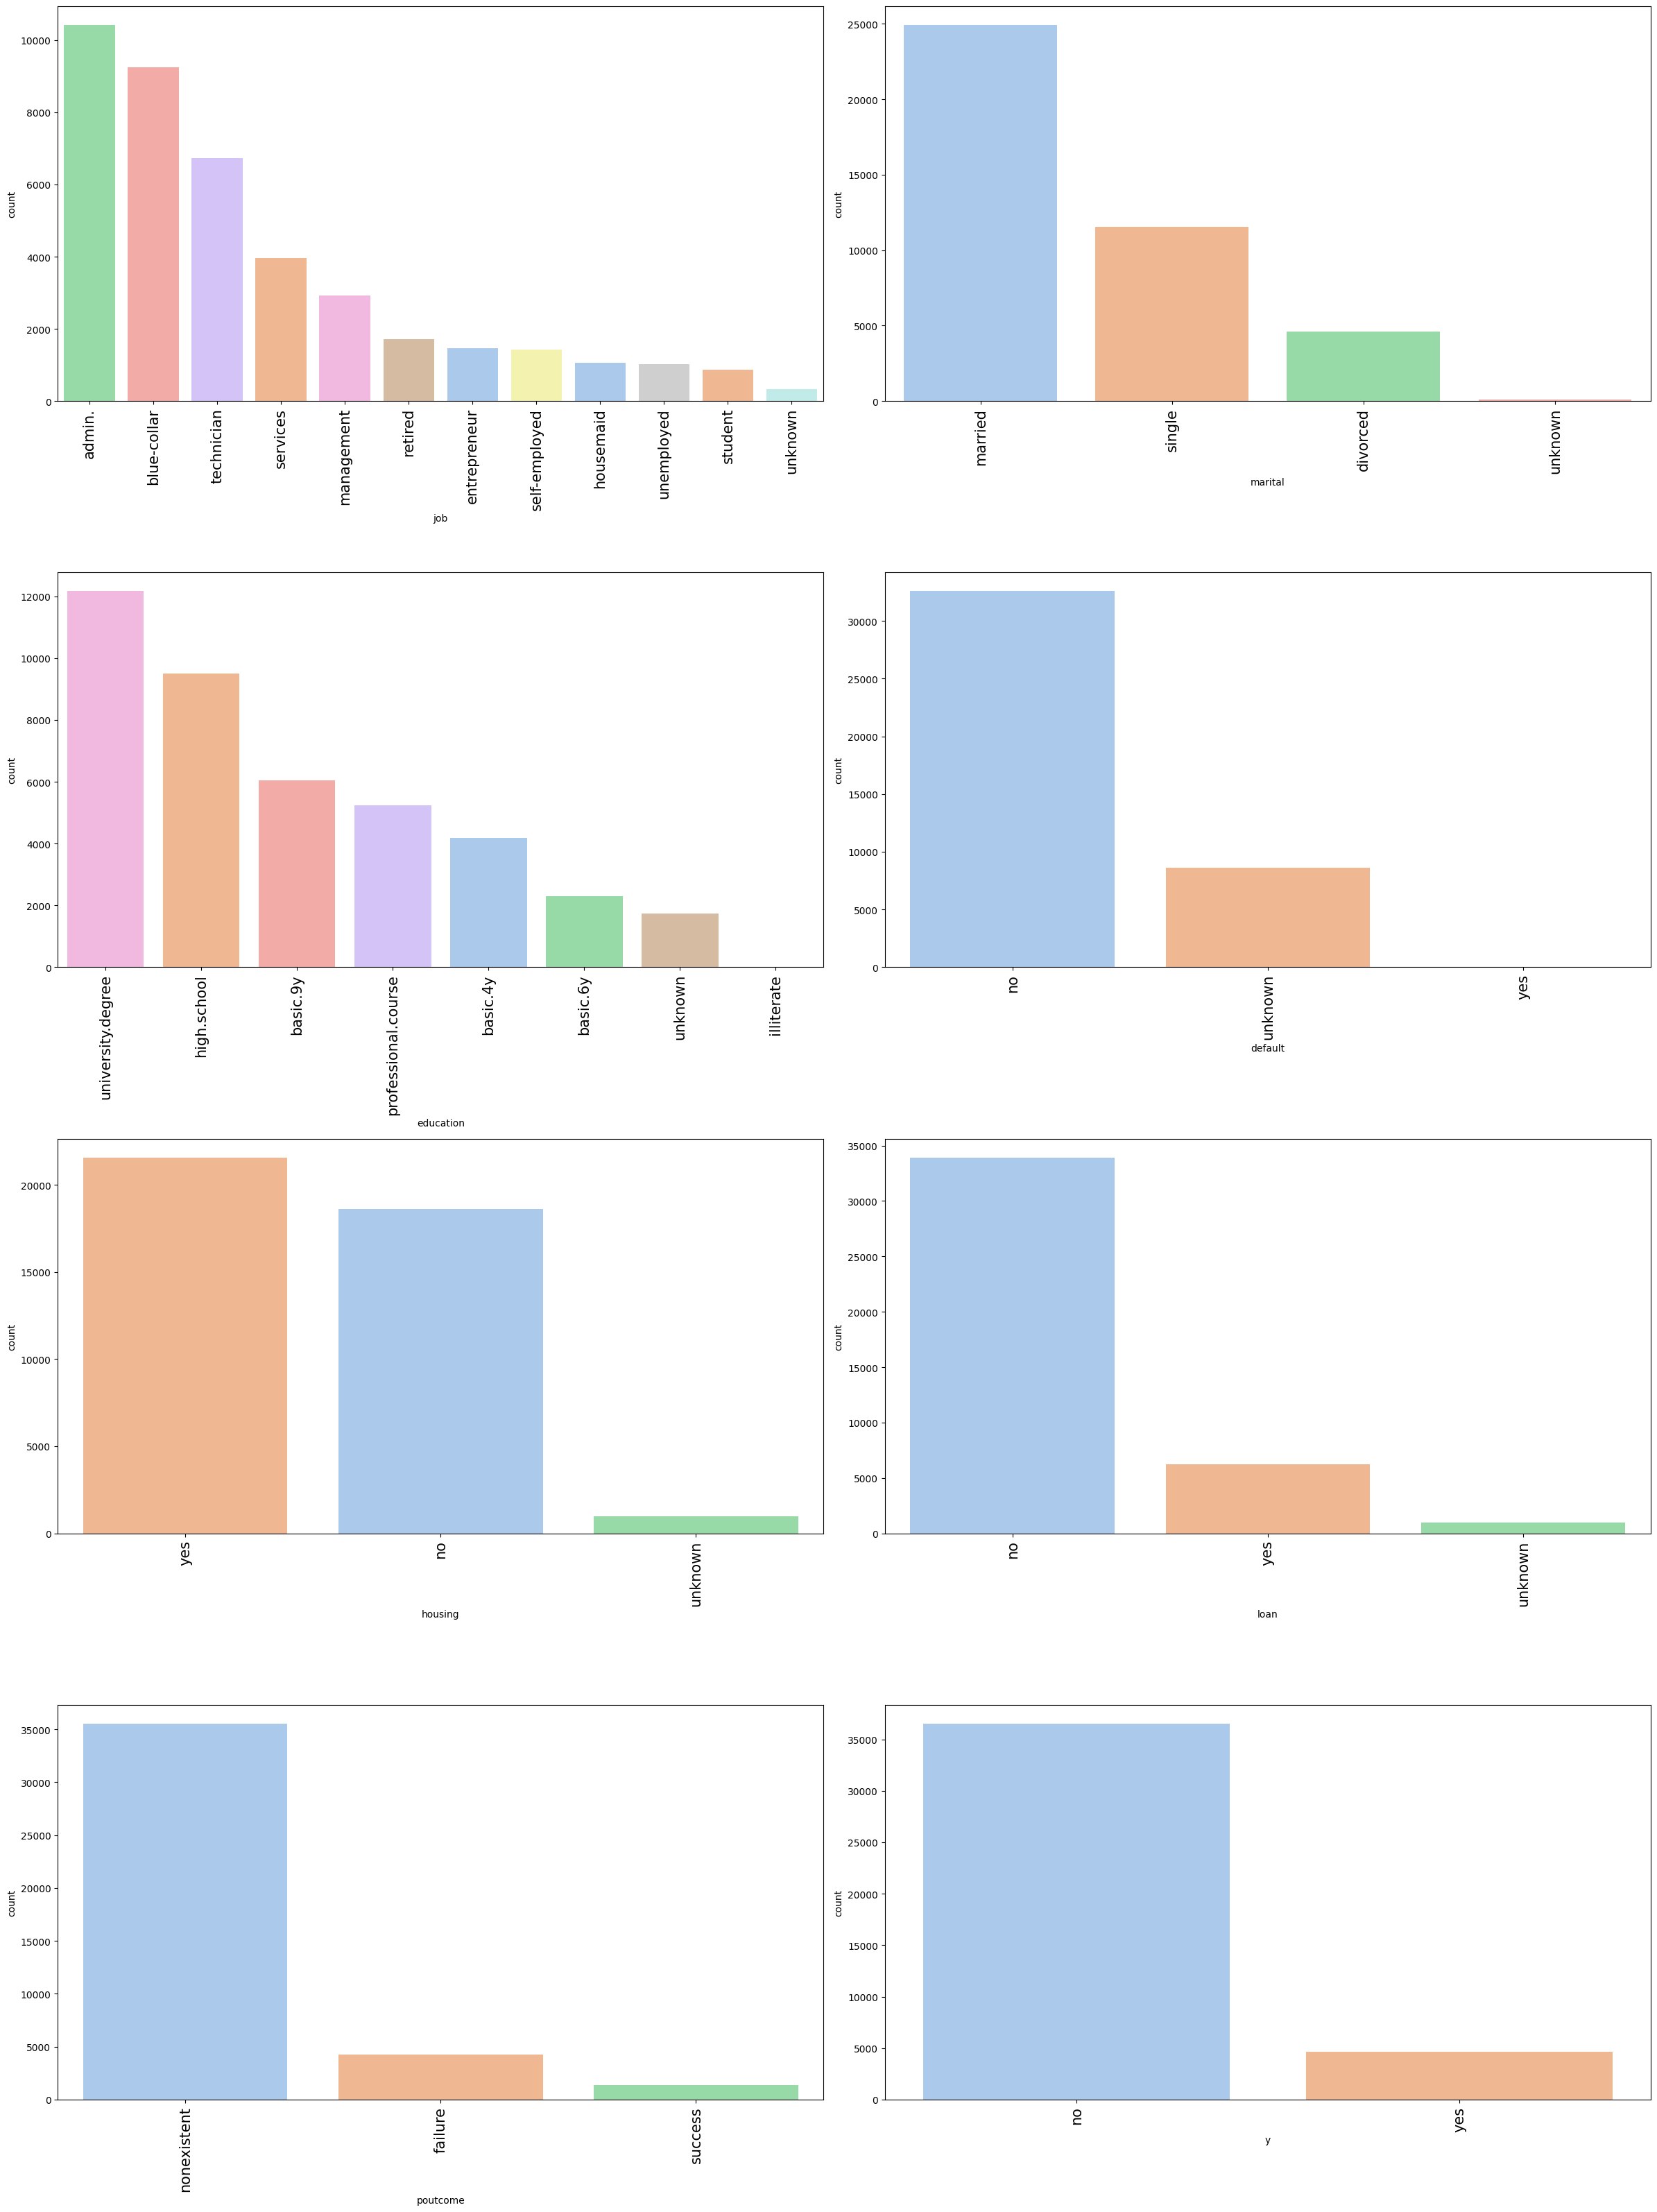

--------------------------------------------------------------
--------------------------------------------------------------

STEP 6.2) UNIVARIABLE ANALYSIS - NUMERIC_var


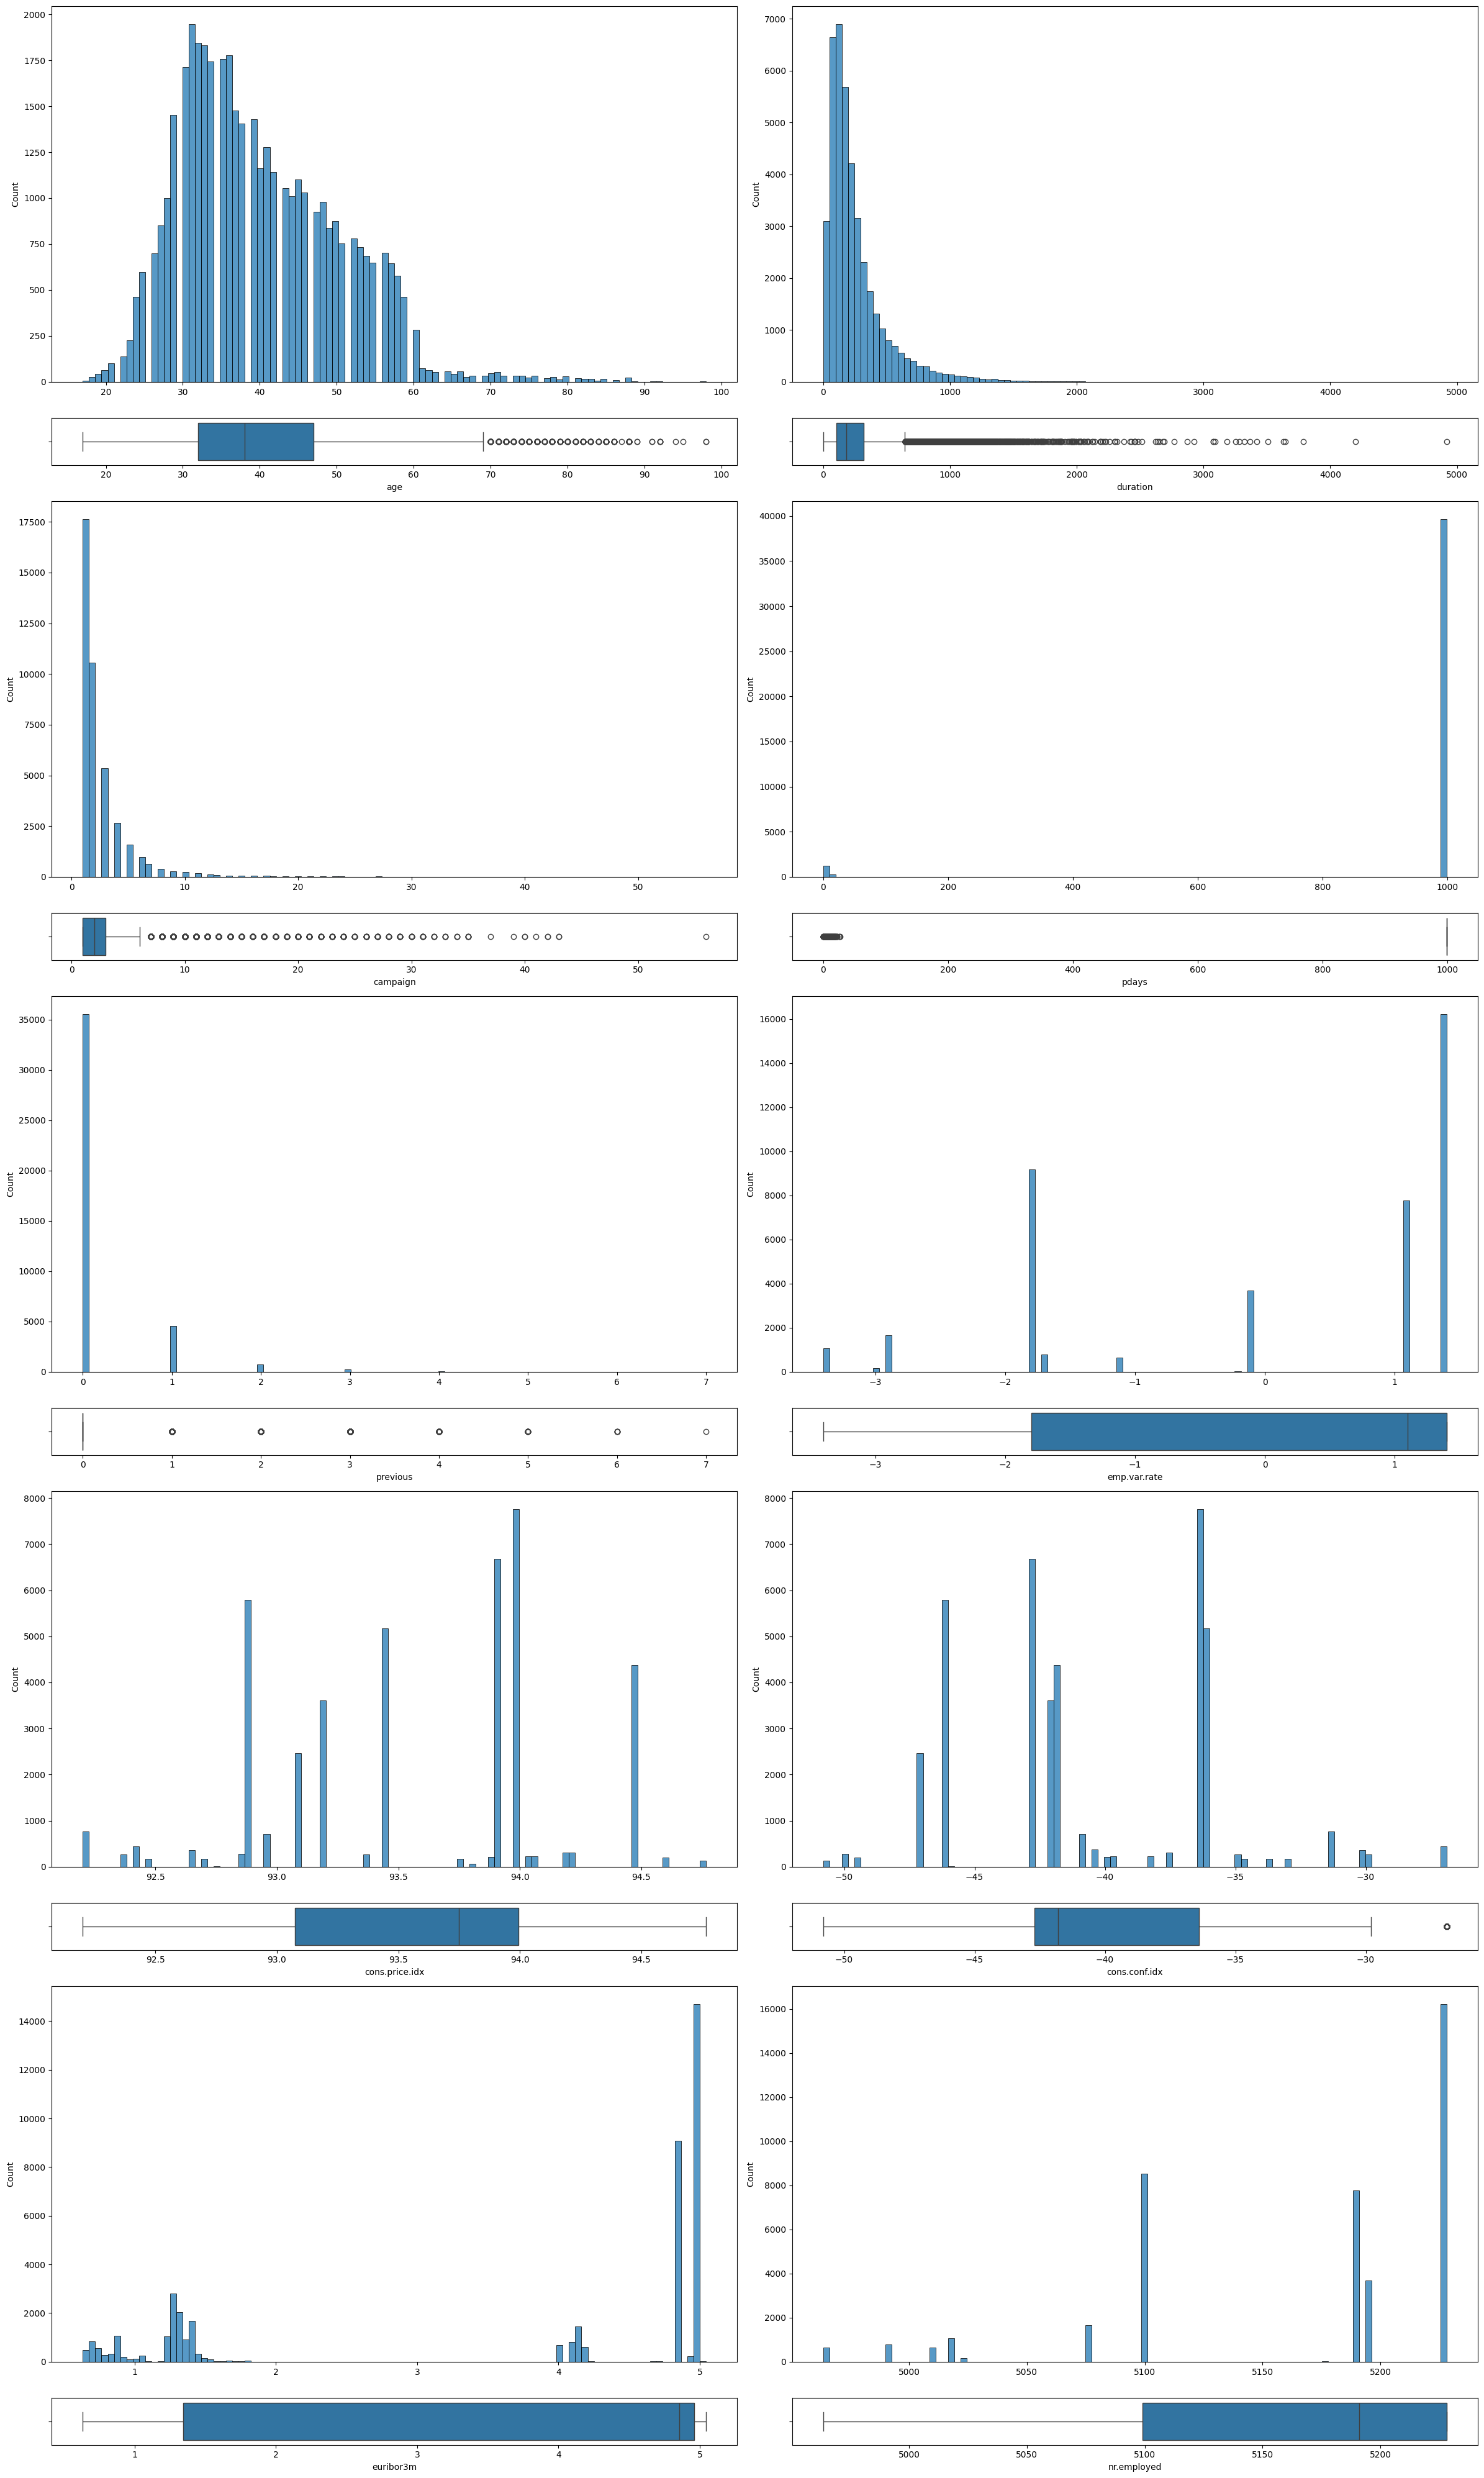

--------------------------------------------------------------
--------------------------------------------------------------

STEP 7.1) MULTIVARIANT ANALYSIS - CATEGORY_var VS COMBINED CATEGORY_target (Countplot)


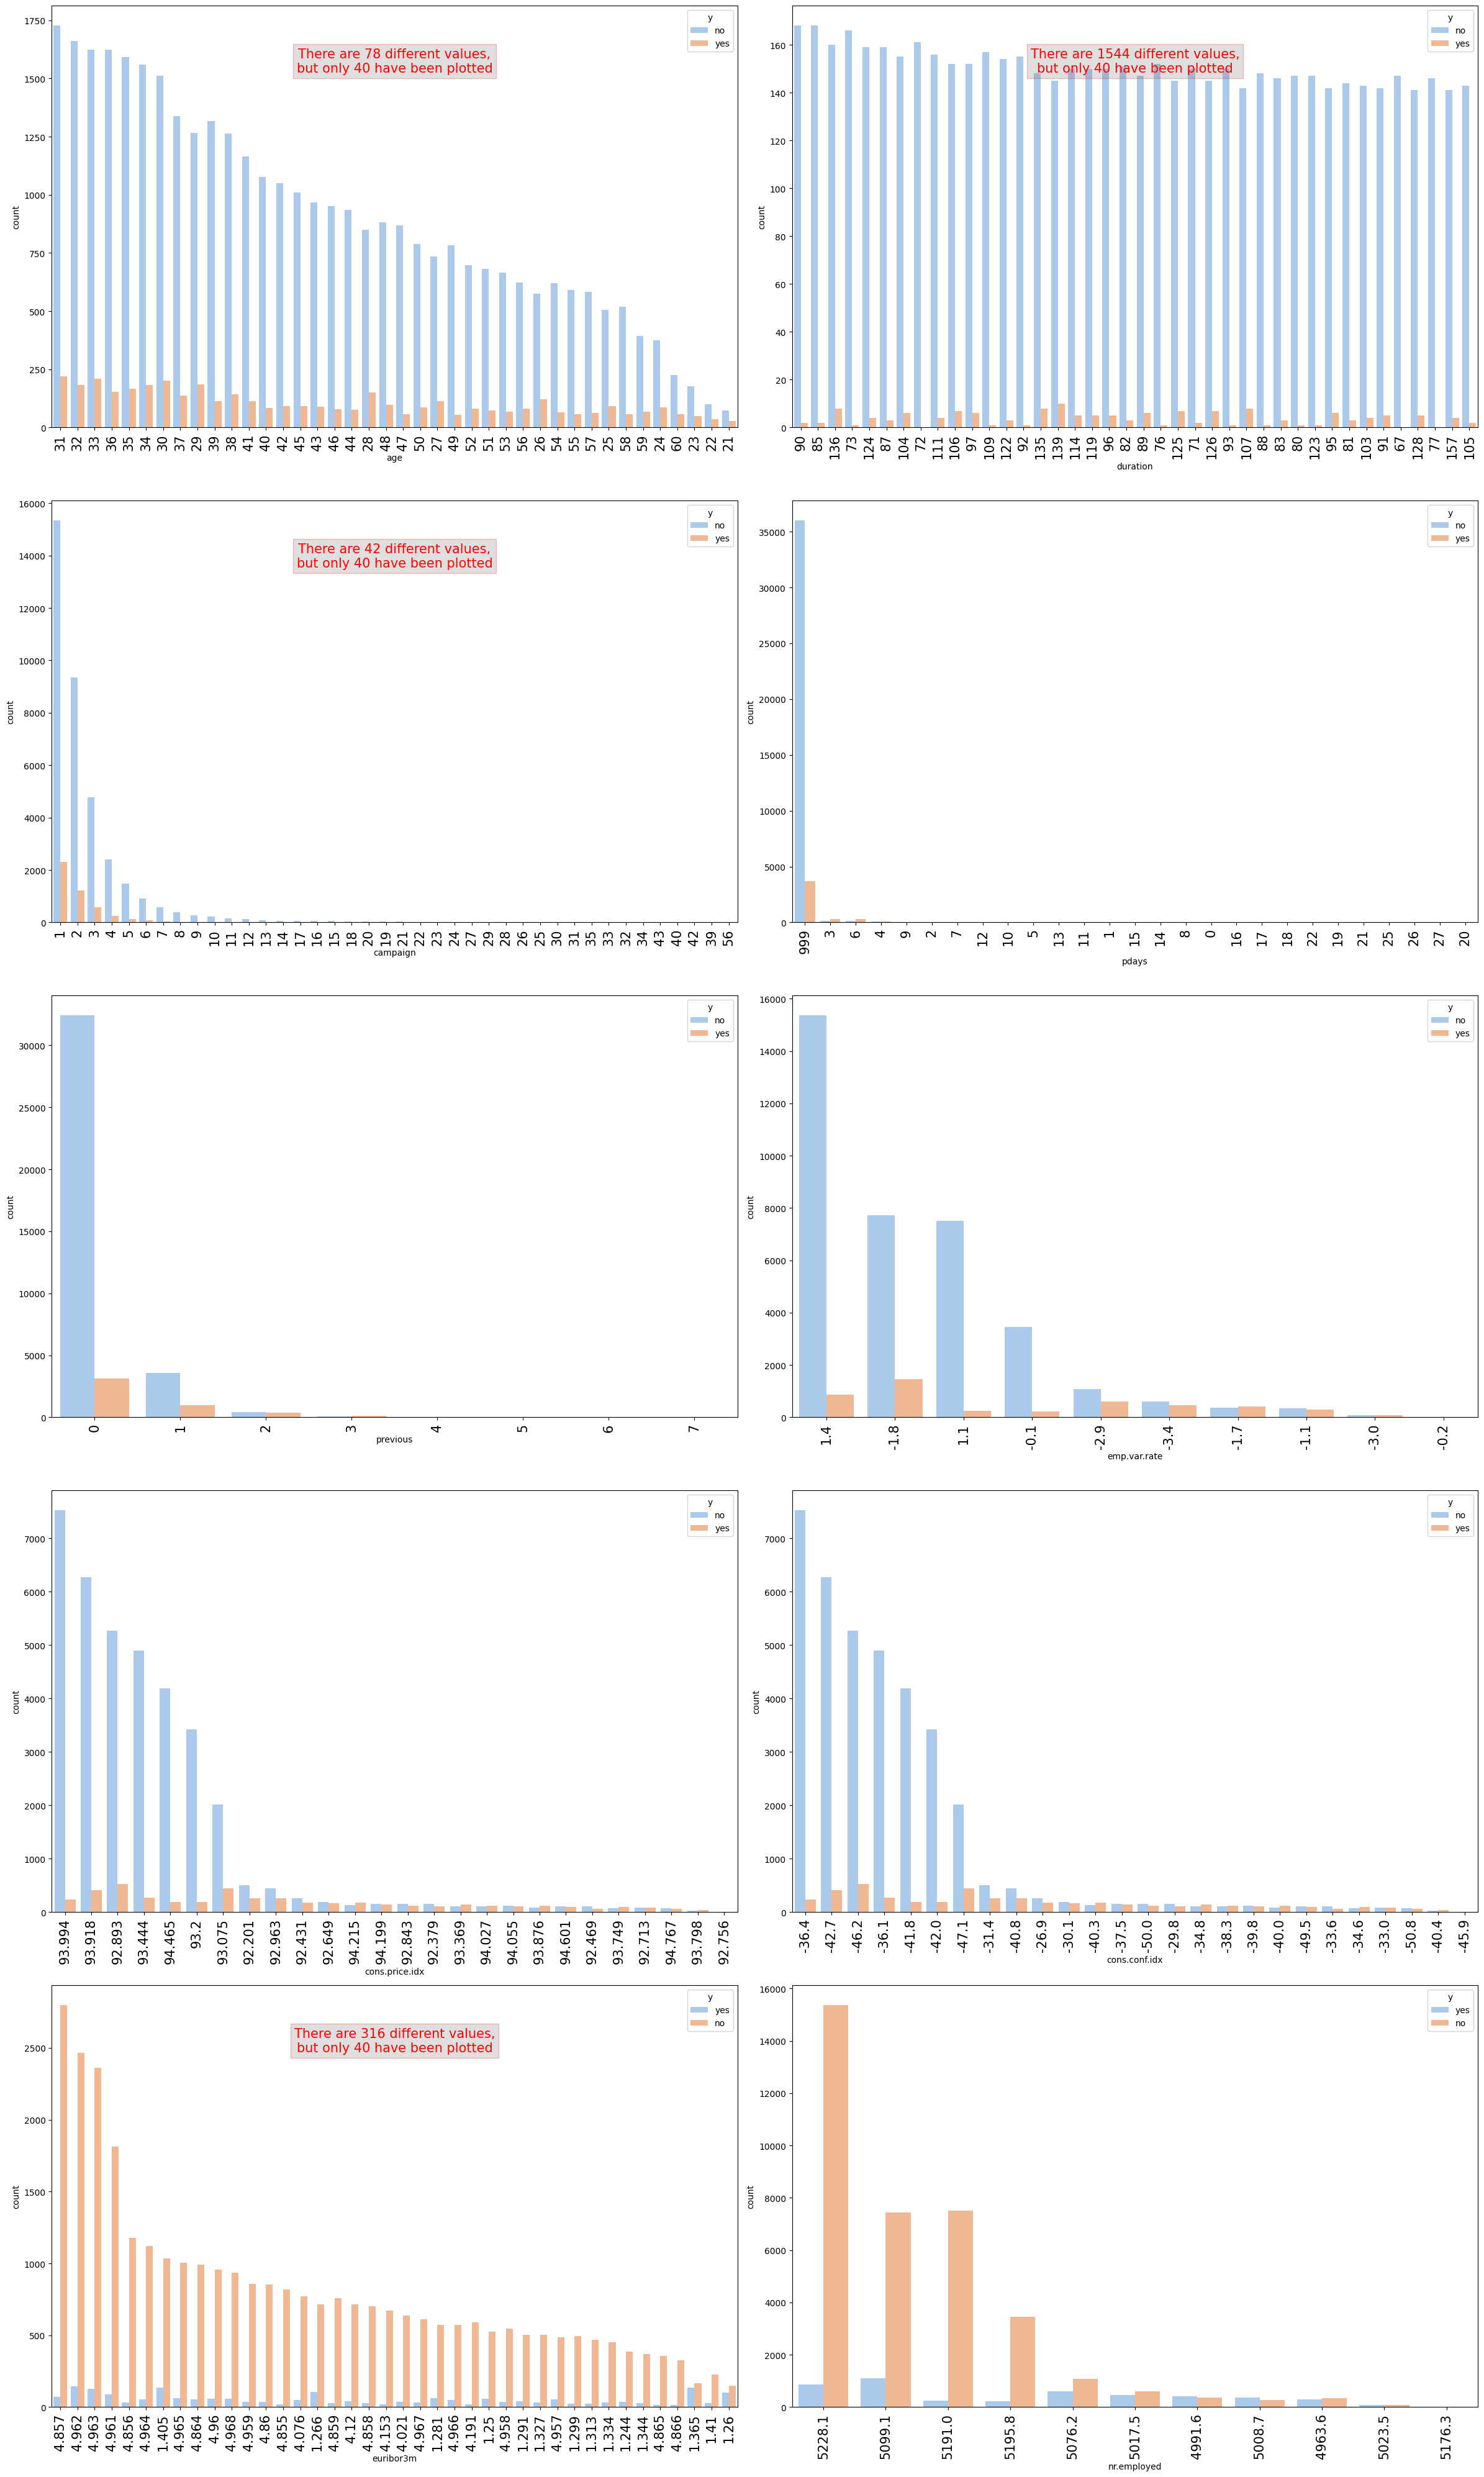

--------------------------------------------------------------
--------------------------------------------------------------

STEP 7.2) MULTIVARIANT ANALYSIS - NUMERIC_var VS NUMERIC_var (Regplot + Heatmap)


--------------------------------------------------------------
--------------------------------------------------------------

STEP 7.3) MULTIVARIANT ANALYIS - COMBINED NUMERIC_var VS NUMERIC_var (Barplot)
This type of plot is non applicable for this case, because the target variable is CATEGORIC
--------------------------------------------------------------
--------------------------------------------------------------

STEP 7.4) MULTIVARIANT ANALYSIS - GLOBAL (Heatmap + Pairplot)


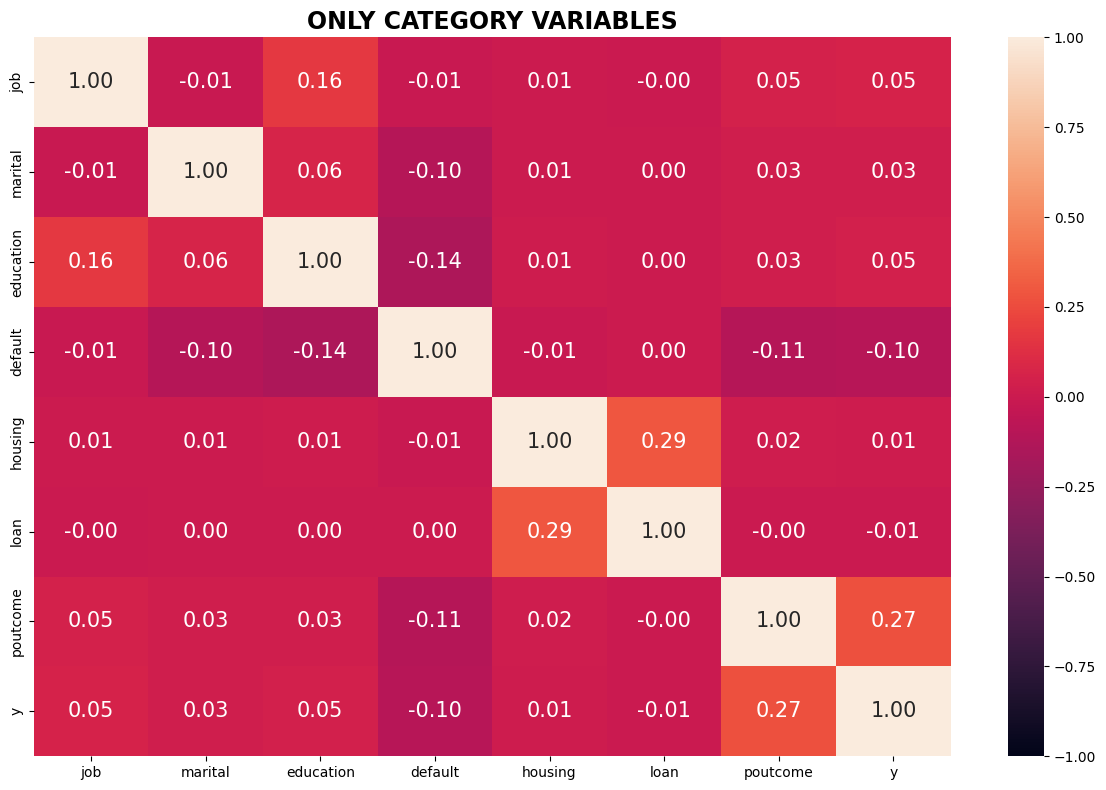

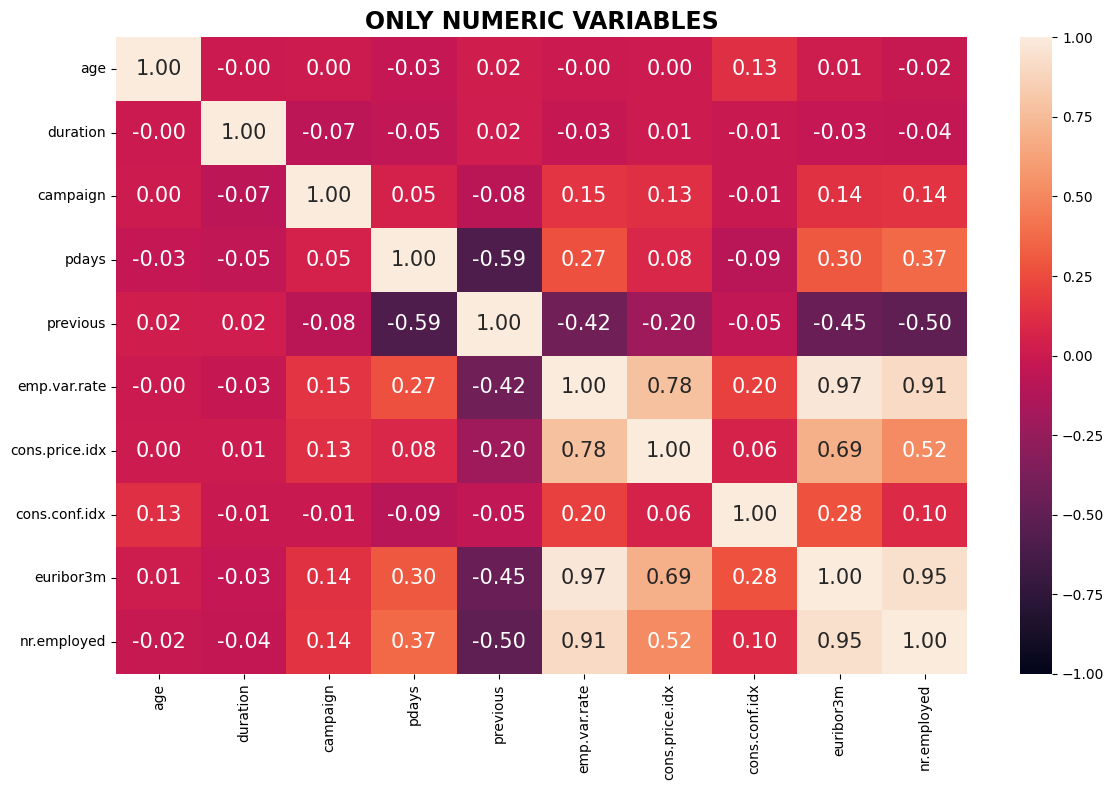

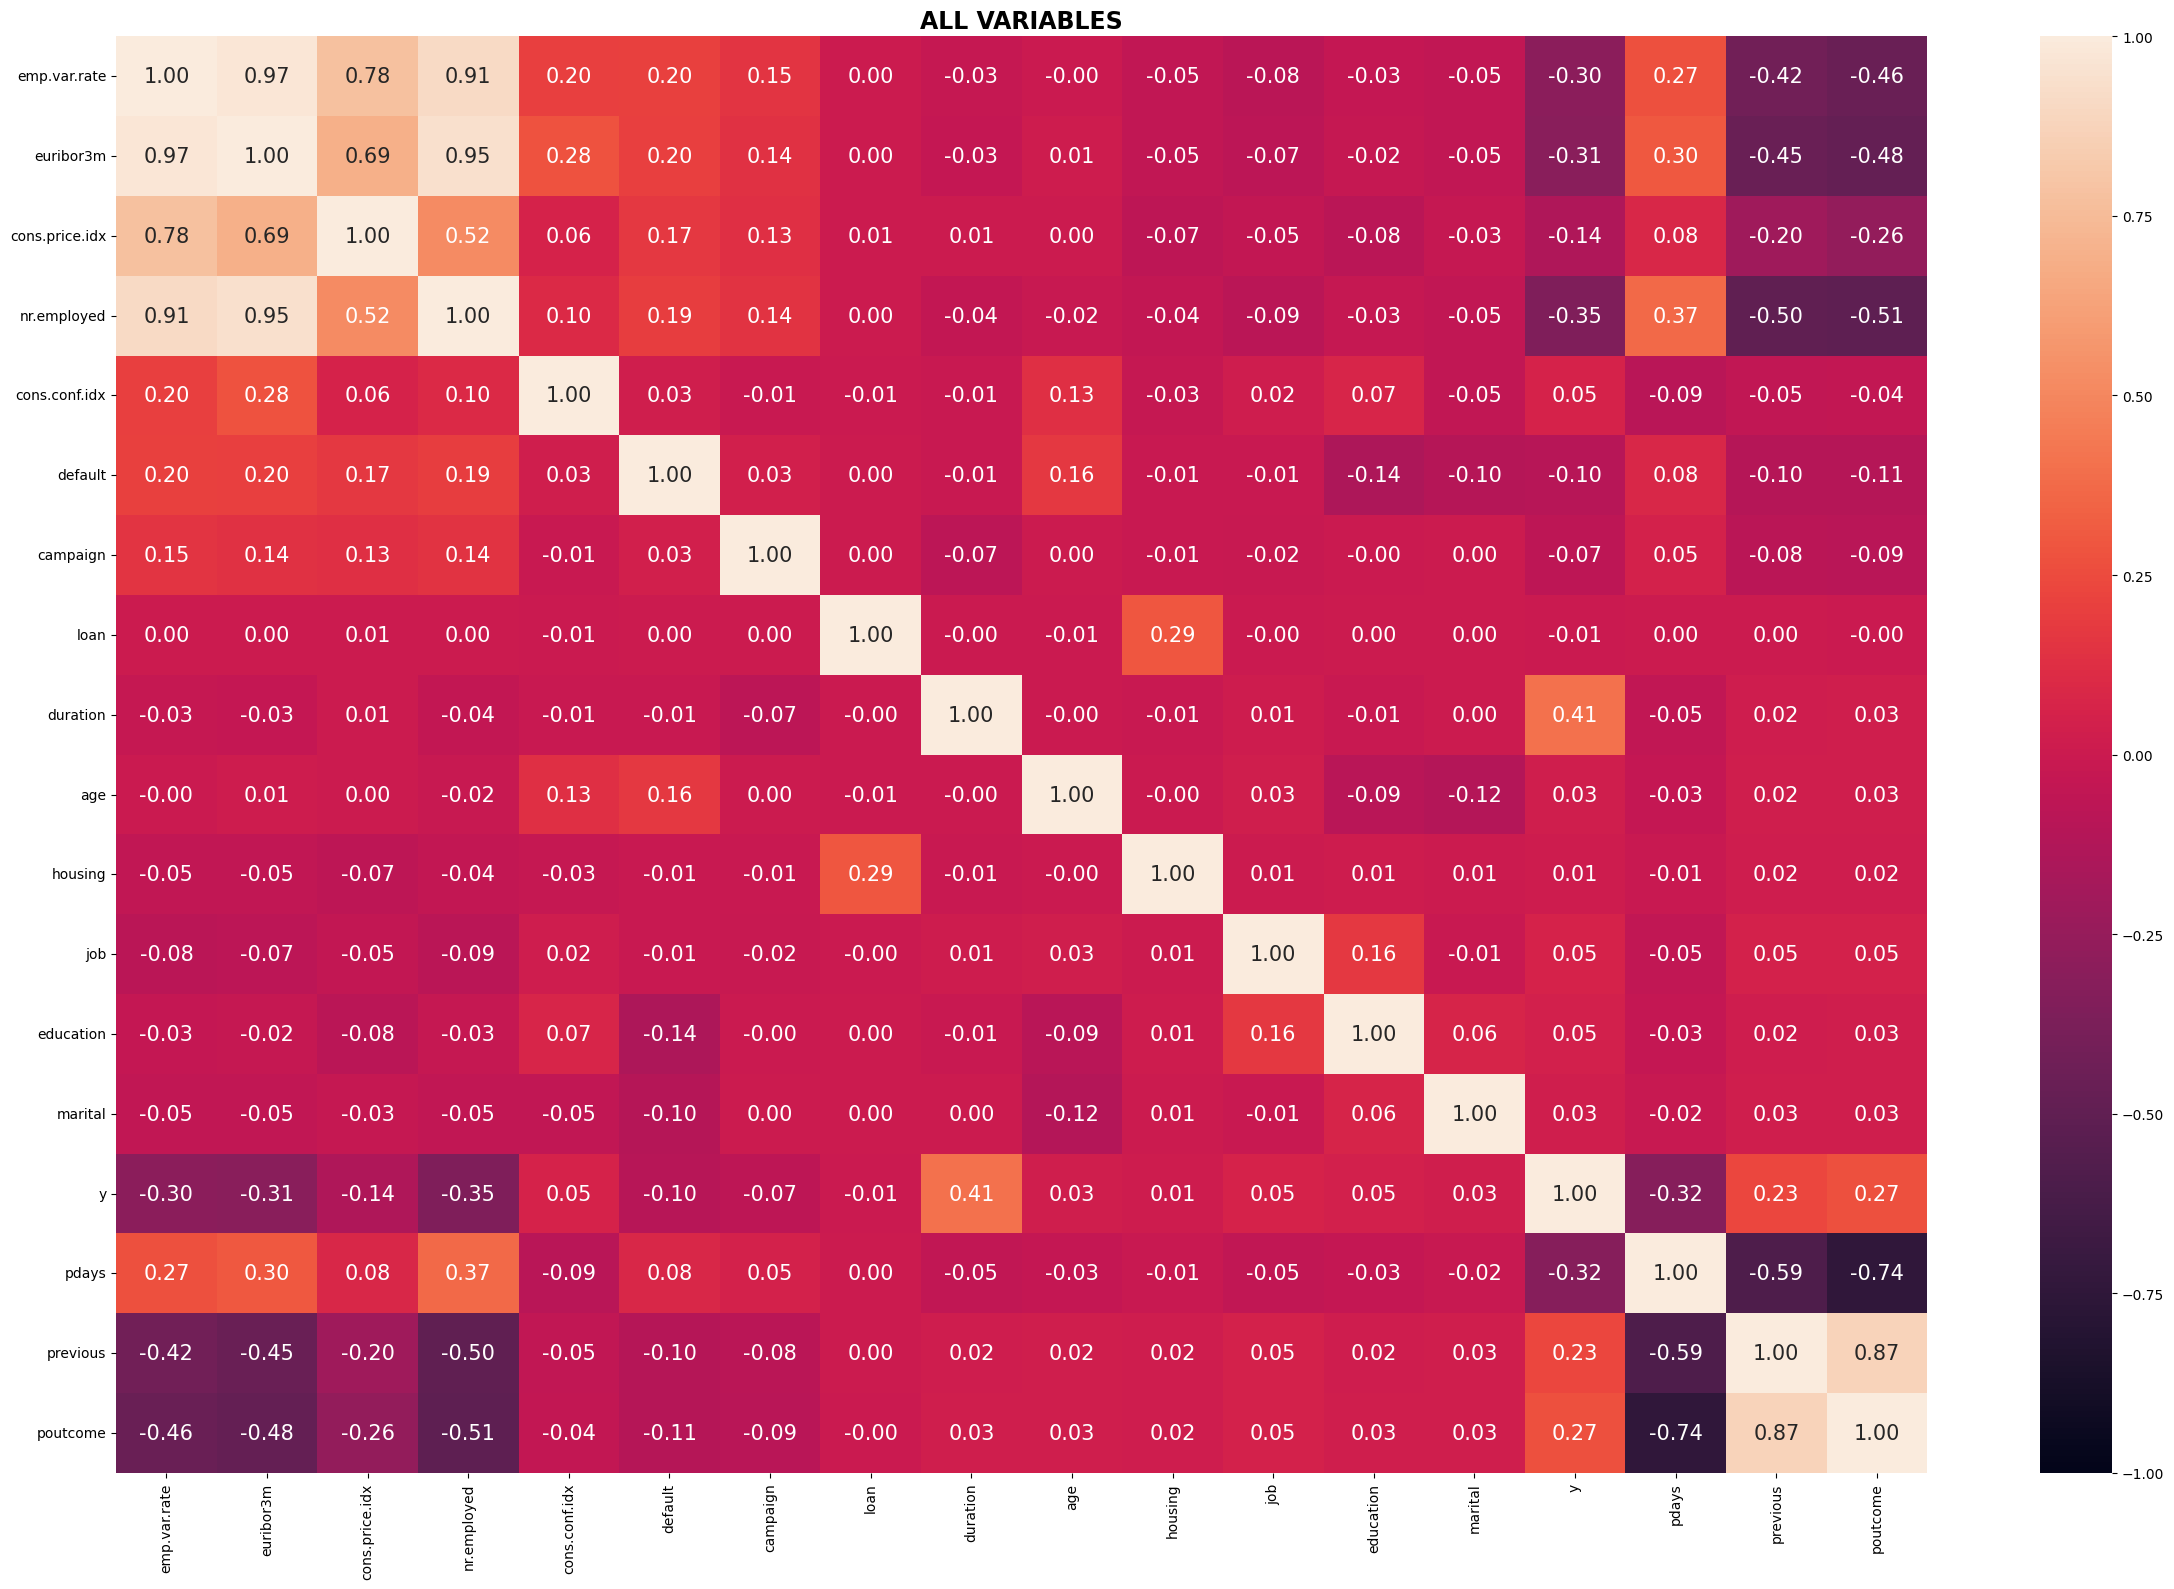

<Figure size 1200x800 with 0 Axes>

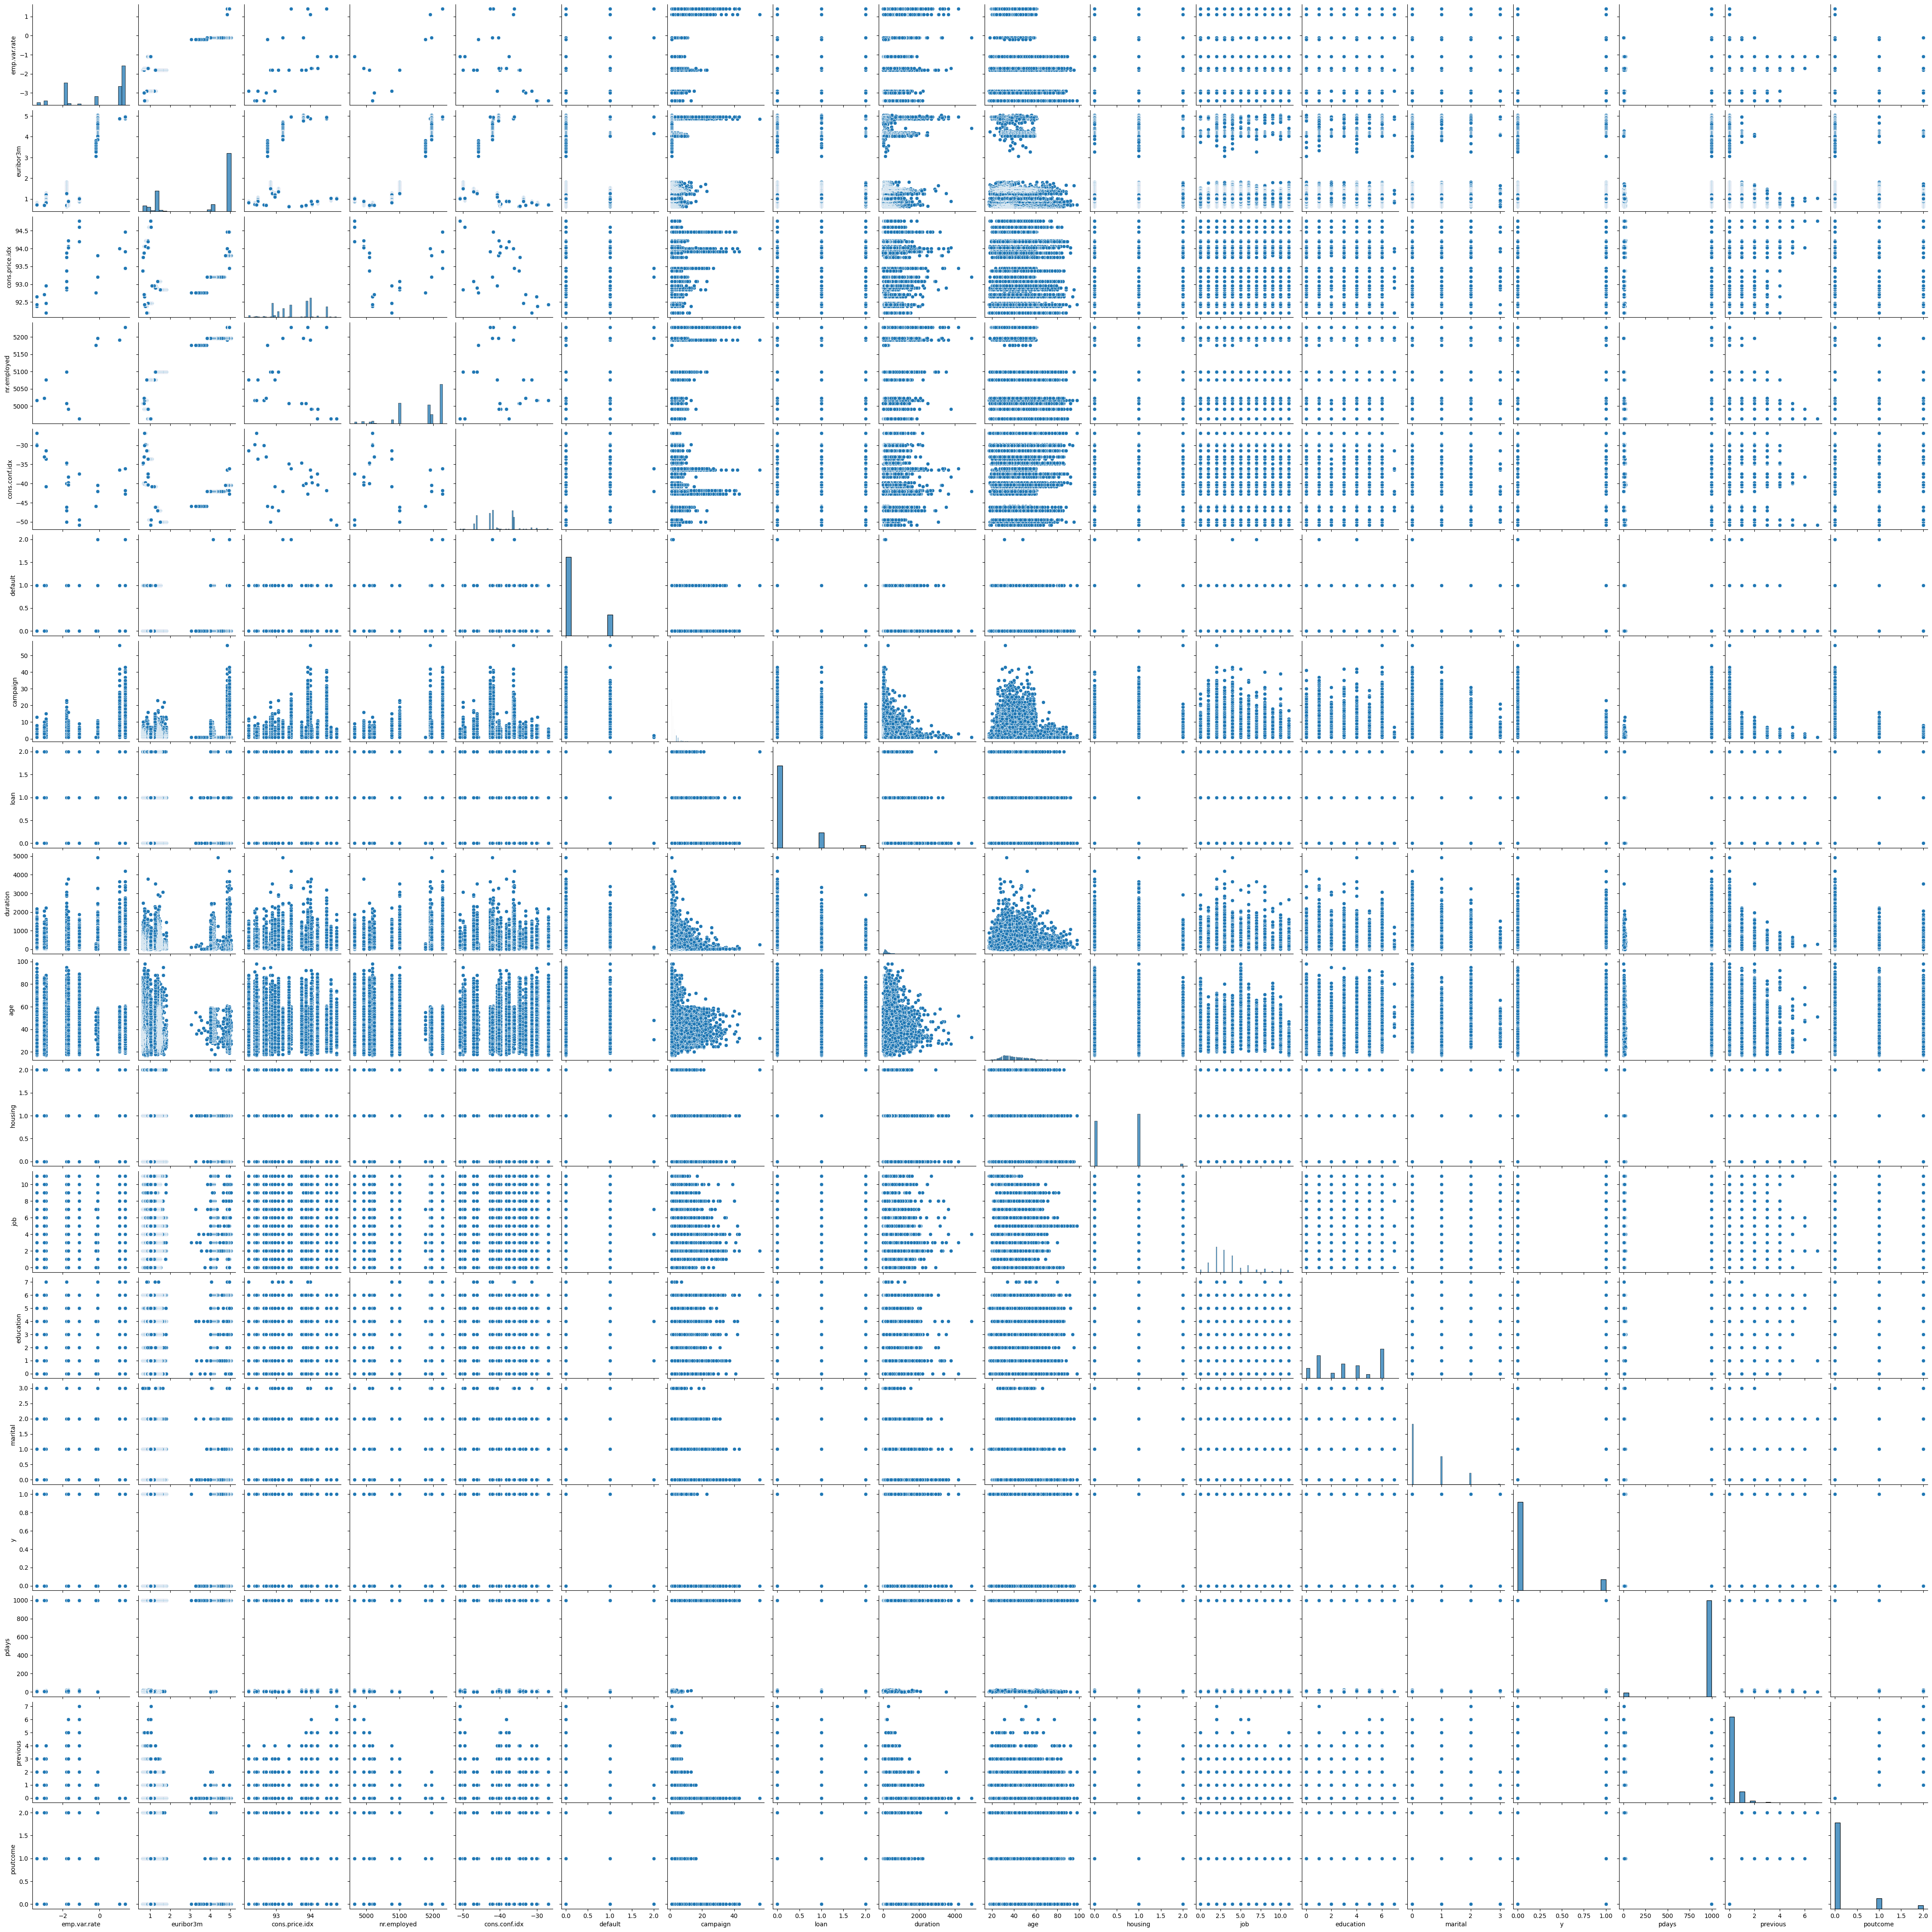

In [ ]:
# STEP 6.1) UNIVARIABLE ANALYSIS - CATEGORY_var
print("STEP 6.1) UNIVARIABLE ANALYSIS - CATEGORY_var")

# Copy  of previous DataFrame
df_S6_1 = df_S5_2.copy()

var_to_plot=category_var # Variable type for this plot
num_rows = math.ceil(len(var_to_plot) / num_cols) # Number of rows for the figure

# Create subplots
fig, axes = plt.subplots(
    nrows = num_rows,
    ncols = num_cols,
    figsize=(figWidth_unit * num_cols, figHeight_unit * num_rows)
)
    
# Flatten the axes array for easier access
axes = axes.flatten()  

# Loop through variables
idx = 0
for col in var_to_plot:
    # Count unique values
    unique_count = df_S6_1[col].nunique()
    
    # Limit the number of plotted categories if there are more than num_values_to_plot
    if unique_count > num_values_to_plot:
        order = df_S6_1[col].value_counts().head(num_values_to_plot).index
    else:
        order = df_S6_1[col].value_counts().index
    
    # Create countplot
    sns.countplot(
        ax = axes[idx],
        data = df_S6_1,
        x = col,
        hue = col,
        palette = my_palette,
        order = order,
        legend = False
    ).tick_params(axis='x', rotation=90, labelsize=my_font_size)
    
    # Add text box if truncated
    if unique_count > num_values_to_plot:
        msg = "There are " + str(unique_count) + " different values,\nbut only " + str(num_values_to_plot) + " have been plotted"
        axes[idx].text(
            x = 0.5,
            y = 0.9,
            s = msg,
            transform=axes[idx].transAxes,
            fontsize=my_font_size,
            color='red',
            ha='center',
            va='top',
            bbox=dict(facecolor='grey', alpha=0.25, edgecolor='red')
        )
    
    idx += 1

# Turn off unused axes if there are any
for j in range(idx, len(axes)):
    axes[j].set_visible(False)

# Adjust layout and display
plt.tight_layout()
plt.show()

print("--------------------------------------------------------------\n--------------------------------------------------------------\n")

# STEP 6.2) UNIVARIABLE ANALYSIS - NUMERIC_var
print("STEP 6.2) UNIVARIABLE ANALYSIS - NUMERIC_var")

# Copy  of previous DataFrame
df_S6_2 = df_S5_2.copy()

var_to_plot=numeric_var # Variable type for this plot
num_rows = math.ceil(len(var_to_plot) / num_cols) # Number of rows for the figure

# Create subplots with custom height ratios
fig, axes = plt.subplots(
    nrows = num_rows * 2,
    ncols =  num_cols,
    figsize=(figWidth_unit * num_cols, figHeight_unit * num_rows),
    gridspec_kw={'height_ratios': [4, 0.5] * num_rows}
)

# Loop through variables
var_idx = 0
for row in range(num_rows):
    for col in range(num_cols):
        if var_idx >= len(var_to_plot):
            # Hide unused subplots
            axes[row * 2, col].set_visible(False)
            axes[row * 2 + 1, col].set_visible(False)
            continue

        # Histogram (top)
        sns.histplot(
            ax = axes[row * 2, col],
            data = df_S6_2,
            x = var_to_plot[var_idx],
            bins = num_bins
        ).set_xlabel("")

        # Boxplot (bottom)
        sns.boxplot(
            ax=axes[row * 2 + 1, col],
            data=df_S6_2,
            x = var_to_plot[var_idx]
        )
        var_idx += 1

# Adjust layout and display
plt.tight_layout()
plt.show()

print("--------------------------------------------------------------\n--------------------------------------------------------------\n")

# Include target variable y as part of the numeric list
if y_var in numeric_var:
    
    # STEP 7.1) MULTIVARIANT ANALYIS - NUMERIC_var VS NUMERIC_target (Regplot + Heatmap)
    print("STEP 7.1) MULTIVARIANT ANALYSIS - NUMERIC_var VS NUMERIC_target (Regplot + Heatmap)")

    # Copy  of previous DataFrame
    df_S7_1 = df_S5_2.copy()

    var_to_plot=numeric_var # Variable type for this plot
    num_rows = math.ceil(len(var_to_plot) / num_cols) # Number of rows for the figure

    # Create subplots with custom height ratios
    fig, axes = plt.subplots(
        nrows = num_rows * 2,
        ncols = num_cols,
        figsize=(figWidth_unit * num_cols, figHeight_unit * num_rows),
        gridspec_kw={'height_ratios': [4, 1] * num_rows}
    )

    # Loop through variables
    var_idx = 0
    for row in range(num_rows):
        for col in range(num_cols):
            if var_idx >= len(var_to_plot):
                # Hide unused subplots
                axes[row * 2, col].set_visible(False)
                axes[row * 2 + 1, col].set_visible(False)
                continue

            # Regplot (top)
            sns.regplot(
                ax = axes[row * 2, col],
                data = df_S7_1,
                x = var_to_plot[var_idx],
                y = y_var,
                scatter_kws = {'s': my_font_size, 'alpha': 0.6},
                line_kws = {'color': 'red'}
            )

            # Boxplot (bottom)
            sns.heatmap(
                ax = axes[row * 2 + 1, col],
                data = df_S7_1[[var_to_plot[var_idx], y_var]].corr(),
                annot = True,
                fmt = ".2f",
                cbar = False
            )
            var_idx += 1

    # Adjust layout
    plt.tight_layout()
    plt.show()
elif y_var in category_var:

    # STEP 7.1) MULTIVARIANT ANALYIS - CATEGORY_var VS COMBINED CATEGORY_target (Countplot)
    print("STEP 7.1) MULTIVARIANT ANALYSIS - CATEGORY_var VS COMBINED CATEGORY_target (Countplot)")
    
    # Copy  of previous DataFrame
    df_S7_1 = df_S5_2.copy()

    hue_order = sorted(df_S7_1[y_var].dropna().unique().tolist()) # Determine hue order dynamically
    var_to_plot=numeric_var # Variable type for this plot
    num_rows = math.ceil(len(var_to_plot) / num_cols) # Number of rows for the figure

    # Create subplots
    fig, axes = plt.subplots(
        nrows = num_rows,
        ncols = num_cols,
        figsize=(figWidth_unit * num_cols, figHeight_unit * num_rows)
    )
        
    # Flatten the axes array for easier access
    axes = axes.flatten()  

    # Loop through variables
    idx = 0
    for col in var_to_plot:
        # Count unique values
        unique_count = df_S7_1[col].nunique()
        
        # Limit the number of plotted categories if there are more than num_values_to_plot
        if unique_count > num_values_to_plot:
            order = df_S7_1[col].value_counts().head(num_values_to_plot).index
        else:
            order = df_S7_1[col].value_counts().index
        
        # Create countplot
        sns.countplot(
            ax = axes[idx],
            data = df_S7_1,
            x = col,
            hue = y_var,
            hue_order = hue_order,
            palette = my_palette,
            order = order,
        ).tick_params(axis='x', rotation=90, labelsize=my_font_size)
        
        # Add text box if truncated
        if unique_count > num_values_to_plot:
            msg = "There are " + str(unique_count) + " different values,\nbut only " + str(num_values_to_plot) + " have been plotted"
            axes[idx].text(
                x = 0.5,
                y = 0.9,
                s = msg,
                transform=axes[idx].transAxes,
                fontsize=my_font_size,
                color='red',
                ha='center',
                va='top',
                bbox=dict(facecolor='grey', alpha=0.25, edgecolor='red')
            )
        
        idx += 1

    # Turn off unused axes if there are any
    for j in range(idx, len(axes)):
        axes[j].set_visible(False)

    # Adjust layout and display
    plt.tight_layout()
    plt.show()

print("--------------------------------------------------------------\n--------------------------------------------------------------\n")

# STEP 7.2) MULTIVARIANT ANALYIS - NUMERIC_var VS NUMERIC_var (Regplot + Heatmap)
print("STEP 7.2) MULTIVARIANT ANALYSIS - NUMERIC_var VS NUMERIC_var (Regplot + Heatmap)")

# Copy  of previous DataFrame
df_S7_2 = df_S5_2.copy()

var_to_plot=numeric_var # Variable type for this plot
num_rows = len(var_to_plot) - 1 # Number of rows (one less than number of variables)

# Create subplots with two stacked plots (regplot + heatmap) per variable pair
fig, axes = plt.subplots(
    nrows = num_rows * 2,
    ncols = len(var_to_plot) - 1,
    figsize=(figWidth_unit * (len(var_to_plot) - 1), figHeight_unit * num_rows),
    gridspec_kw={'height_ratios': [4, 1] * num_rows}
)

# Flatten axes for easy handling
axes = np.array(axes)

# Track subplot usage
for row in range(num_rows):
    n_cols = len(var_to_plot) - row - 1 # Decreasing number of columns each row
    for col in range(n_cols):

        # Top: regplot
        sns.regplot(
            ax = axes[row * 2, col],
            data = df_S7_2,
            x = var_to_plot[row + col + 1],
            y = var_to_plot[row],
            scatter_kws = {'s': my_font_size, 'alpha': 0.6},
            line_kws = {'color': 'red'}
        ).set_xlabel(var_to_plot[row + col + 1],fontsize=20)

        # Show Y label only for first plot in row
        if col == 0:
            axes[row * 2, col].set_ylabel(var_to_plot[row],fontsize=my_font_size)
        else:
            axes[row * 2, col].set_ylabel("")

        # Bottom: heatmap (correlation)
        sns.heatmap(
            ax = axes[row * 2 + 1, col],
            data = df_S7_2[[var_to_plot[row + col + 1], var_to_plot[row]]].corr(),
            annot = True,
            fmt = ".2f",
            cbar = False,
            annot_kws = {"size": 20}
        )

    # Hide unused subplots on the right for this row
    for col in range(n_cols, len(var_to_plot) - 1):
        axes[row * 2, col].set_visible(False)
        axes[row * 2 + 1, col].set_visible(False)

# Adjust layout and show
plt.tight_layout()
plt.show()

print("--------------------------------------------------------------\n--------------------------------------------------------------\n")

# STEP 7.3) MULTIVARIANT ANALYIS - COMBINED NUMERIC_var VS NUMERIC_var (Barplot)
print("STEP 7.3) MULTIVARIANT ANALYIS - COMBINED NUMERIC_var VS NUMERIC_var (Barplot)")

# Include target variable y as part of the numeric list
if y_var in numeric_var:

    # Copy  of previous DataFrame
    df_S7_3 = df_S5_2.copy()

    var_to_plot=category_var # Variable type for this plot
    num_rows = math.ceil(len(var_to_plot) / num_cols) # Number of rows for the figure

    # Create subplots
    fig, axes = plt.subplots(
        nrows = num_rows,
        ncols = num_cols,
        figsize = (figWidth_unit * num_cols, figHeight_unit * num_rows)
    )

    # flatten the axes array for easier access
    axes = axes.flatten()  

    # Loop through variables
    idx = 0
    for col in var_to_plot:

        # Count unique values
        unique_count = df_S7_3[col].nunique()
        
        # Limit the number of plotted categories if there are more than num_values_to_plot
        if unique_count > num_values_to_plot:
            order = df_S7_3[col].value_counts().head(num_values_to_plot).index
        else:
            order = df_S7_3[col].value_counts().index
        
        # Create barplot
        sns.barplot(
            ax=axes[idx],
            data = df_S7_3,
            x = col,
            y = y_var,
            hue = cat_var_comb,
            order = order,
            ).tick_params(axis='x', rotation=90, labelsize=10)
        
        # Add text box if truncated
        if unique_count > num_values_to_plot:
            msg = "There are " + str(unique_count) + " different values,\nbut only " + str(num_values_to_plot) + " have been plotted"
            axes[idx].text(
                x = 0.5,
                y = 0.9,
                s = msg,
                transform=axes[idx].transAxes,
                fontsize = my_font_size,
                color = 'red',
                ha = 'center',
                va = 'top',
                bbox = dict(facecolor='grey', alpha=0.5, edgecolor='red')
            )
        
        idx += 1

    # Turn off unused axes if there are any
    for j in range(idx, len(axes)):
        axes[j].set_visible(False)

    # Adjust layout and display
    plt.tight_layout()
    plt.show()

else:
    print("This type of plot is non applicable for this case, because the target variable is CATEGORIC")

print("--------------------------------------------------------------\n--------------------------------------------------------------\n")

# STEP 7.4) MULTIVARIANT ANALYSIS - GLOBAL (Heatmap + Pairplot)
print("STEP 7.4) MULTIVARIANT ANALYSIS - GLOBAL (Heatmap + Pairplot)")

# Copy of previous DataFrame
df_S7_4 = df_S5_2.copy()

# Encode categorical variables using the Series.factorize() method
for col in category_var:
    codes, uniques = df_S7_4[col].factorize()
    df_S7_4[col] = codes  # replace column with integer codes

# CATEGORY VARIABLES HEATMAP
if len(category_var) > 1:
    corr_cat = df_S7_4[category_var].corr()
    fig = plt.figure(figsize=(figWidth_unit, figHeight_unit))
    plt.title("ONLY CATEGORY VARIABLES", fontsize=my_font_size + 2, fontweight="bold")
    sns.heatmap(
        data=corr_cat,
        annot=True,
        vmin=-1,
        vmax=1,
        fmt=".2f",
        annot_kws={"size": my_font_size}
    )
    plt.tight_layout()
    plt.show()
else:
    print("⚠️ Not enough categorical variables for a correlation matrix.")

# NUMERIC VARIABLES HEATMAP
if len(numeric_var) > 1:
    corr_num = df_S7_4[numeric_var].corr()
    fig = plt.figure(figsize=(figWidth_unit, figHeight_unit))
    plt.title("ONLY NUMERIC VARIABLES", fontsize=my_font_size + 2, fontweight="bold")
    sns.heatmap(
        data=corr_num,
        annot=True,
        vmin=-1,
        vmax=1,
        fmt=".2f",
        annot_kws={"size": my_font_size}
    )
    plt.tight_layout()
    plt.show()
else:
    print("⚠️ Not enough numeric variables for a correlation matrix.")

# ALL VARIABLES HEATMAP
corr_matrix = df_S7_4.corr()
corr_order = corr_matrix.mean().sort_values(ascending=False).index
corr_matrix = corr_matrix.loc[corr_order, corr_order]

fig = plt.figure(figsize=(2 * figWidth_unit, 2 * figHeight_unit))
plt.title("ALL VARIABLES", fontsize=my_font_size + 2, fontweight="bold")
sns.heatmap(
    data=corr_matrix,
    annot=True,
    vmin=-1,
    vmax=1,
    fmt=".2f",
    annot_kws={"size": my_font_size}
)
plt.tight_layout()
plt.show()

# --- PAIRPLOT (sorted by correlation order) ---
fig = plt.figure(figsize=(figWidth_unit, figHeight_unit))
sns.pairplot(data=df_S7_4[corr_order])
plt.show()

In [16]:
# STEP 8.1) DEFINE OUTLIERS
print("STEP 8.1) DEFINE OUTLIERS")

# Copy  of previous DataFrame
df_S8_1=df_S5_2.copy()

# Outliers detection is applied over numeric attributes
cols = numeric_var

# Print info
display(df_S8_1.describe())

# Initialize containers
lower_limits = []
upper_limits = []
n_outliers_lower = []
n_outliers_upper = []
pct_outliers_lower = []
pct_outliers_upper = []
extreme_lower_limits = []
extreme_upper_limits = []
n_extreme_outliers_lower = []
n_extreme_outliers_upper = []
pct_extreme_outliers_lower = []
pct_extreme_outliers_upper = []

len(df_S8_1.index)

for col in cols:
    Q1 = df_S8_1[col].quantile(0.25)
    Q3 = df_S8_1[col].quantile(0.75)
    IQR = Q3 - Q1

    # Calulate limits
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR
    extreme_lower = Q1 - 3 * IQR
    extreme_upper = Q3 + 3 * IQR

    # Count num of outliers
    n_low = (df_S8_1[col] < lower).sum()
    n_high = (df_S8_1[col] > upper).sum()
    n_extreme_low = (df_S8_1[col] < extreme_lower).sum()
    n_extreme_high = (df_S8_1[col] > extreme_upper).sum()

    # Percentages of outliers
    pct_low = (n_low / len(df_S8_1.index)) * 100
    pct_high = (n_high / len(df_S8_1.index)) * 100
    pct_extreme_low = (n_extreme_low / len(df_S8_1.index)) * 100
    pct_extreme_high = (n_extreme_high / len(df_S8_1.index)) * 100

    # Save limits
    lower_limits.append(lower)
    upper_limits.append(upper)
    extreme_lower_limits.append(extreme_lower)
    extreme_upper_limits.append(extreme_upper)

    # Save num of outliers
    n_outliers_lower.append(n_low)
    n_outliers_upper.append(n_high)
    n_extreme_outliers_lower.append(n_extreme_low)
    n_extreme_outliers_upper.append(n_extreme_high)

    # Save percentages of outliers
    pct_outliers_lower.append(pct_low)
    pct_outliers_upper.append(pct_high)
    pct_extreme_outliers_lower.append(pct_extreme_low)
    pct_extreme_outliers_upper.append(pct_extreme_high)


# Build DataFrame with all results
df_limits = pd.DataFrame(
    [
        lower_limits,
        upper_limits,
        n_outliers_lower,
        n_outliers_upper,
        pct_outliers_lower,
        pct_outliers_upper
    ],
    columns=cols,
    index=[
        "lower_limit",
        "upper_limit",
        "n_outliers_lower",
        "n_outliers_upper",
        "pct_outliers_lower",
        "pct_outliers_upper"
    ]
)
df_extreme_limits = pd.DataFrame(
    [
        extreme_lower_limits,
        extreme_upper_limits,
        n_extreme_outliers_lower,
        n_extreme_outliers_upper,
        pct_extreme_outliers_lower,
        pct_extreme_outliers_upper
    ],
    columns=cols,
    index=[
        "extreme_lower_limit",
        "extreme_upper_limit",
        "n_extreme_outliers_lower",
        "n_extreme_outliers_upper",
        "pct_extreme_outliers_lower",
        "pct_extreme_outliers_upper"
    ]
)
# Display results
display(df_limits)
display(df_extreme_limits)

print("--------------------------------------------------------------\n--------------------------------------------------------------\n")

# STEP 8.2) CLEAN OUTLIERS
print("STEP 8.2) CLEAN OUTLIERS")

# Copy  of previous DataFrame
df_S8_2=df_S8_1.copy()

# Outliers detection is applied over numeric attributes
cols = numeric_var

if removal_type == "NORMAL OUTLIERS":
    # Loop through each column and apply filtering rules
    for col in cols:
        low_limit = df_limits.loc["lower_limit", col]
        high_limit = df_limits.loc["upper_limit", col]
        pct_low = df_limits.loc["pct_outliers_lower", col]
        pct_high = df_limits.loc["pct_outliers_upper", col]
        
        # Remove low outliers if below threshold
        print(f"- ATTRIBUTE {col}:")
        if pct_low <= low_outliers_threshold:
            df_S8_2 = df_S8_2[df_S8_2[col] >= low_limit]
            print(f" - ⚠️ REMOVED lower outliers ({pct_low:.2f}% <= {low_outliers_threshold}%)")
        else:
            print(f" - ✅ KEPT lower outliers ({pct_low:.2f}% > {low_outliers_threshold}%)")
        
        # Remove high outliers if below threshold
        if pct_high <= up_outliers_threshold:
            df_S8_2 = df_S8_2[df_S8_2[col] <= high_limit]
            print(f" - ⚠️ REMOVED upper outliers ({pct_high:.2f}% <= {up_outliers_threshold}%)")
        else:
            print(f" - ✅ KEPT upper outliers ({pct_high:.2f}% > {up_outliers_threshold}%)")
        print("\n")
elif removal_type == "EXTREME OUTLIERS":
    # Loop through each column and apply filtering rules
    for col in cols:
        low_limit = df_extreme_limits.loc["extreme_lower_limit", col]
        high_limit = df_extreme_limits.loc["extreme_upper_limit", col]
        pct_low = df_extreme_limits.loc["pct_extreme_outliers_lower", col]
        pct_high = df_extreme_limits.loc["pct_extreme_outliers_upper", col]
        
        # Remove low outliers if below threshold
        print(f"- ATTRIBUTE {col}:")
        if pct_low <= low_outliers_threshold:
            df_S8_2 = df_S8_2[df_S8_2[col] >= low_limit]
            print(f" - ⚠️ REMOVED extreme lower outliers ({pct_low:.2f}% <= {low_outliers_threshold}%)")
        else:
            print(f" - ✅ KEPT extreme lower outliers ({pct_low:.2f}% > {low_outliers_threshold}%)")
        
        # Remove high outliers if below threshold
        if pct_high <= up_outliers_threshold:
            df_S8_2 = df_S8_2[df_S8_2[col] <= high_limit]
            print(f" - ⚠️ REMOVED extreme upper outliers ({pct_high:.2f}% <= {up_outliers_threshold}%)")
        else:
            print(f" - ✅ KEPT extreme upper outliers ({pct_high:.2f}% > {up_outliers_threshold}%)")
        print("\n")

print("- ✅Outliers cleaning completed.")
print(f" - ℹ️ Original df's rows: {len(df_S8_1)}")
print(f" - ℹ️ Cleaned df's  rows: {len(df_S8_2)}")
display(df_S8_2.describe())

print("--------------------------------------------------------------\n--------------------------------------------------------------\n")

# STEP 9) MISSING VALUES
print("STEP 9) MISSING VALUES")

# Copy  of previous DataFrame
df_S9 = df_S8_2.copy()

# Identify categorical variables suitable for grouping (<6 unique values)
group_vars = []
for col in category_var:
    if df_S9[col].nunique() < 6:
        group_vars.append(col)

# Calculate percentage of missing values per column
missing_pct = (df_S9.isnull().sum() / len(df_S9)) * 100
missing_pct = missing_pct[missing_pct > 0].sort_values(ascending=False)

if len(missing_pct) == 0:
    print("- ✅ DataFrame has no missing values at all")
else:
    # Process each column with missing data
    for col in missing_pct.index:
        pct = missing_pct[col]
        print(f"- ⚠️ Column: {col} → {pct:.2f}% missing")

        # Case 1: Fill with grouped median if percentage above threshold
        if pct > th_fill and len(group_vars) > 0:
            print(f" - ⚠️ FILLED missing values in {col} using grouped median by {group_vars}...\n")

            # Compute median by group
            medians = df_S9.groupby(group_vars)[col].median().reset_index()
            medians = medians.rename(columns={col: f"median_{col}"})

            # Merge medians back into df
            df_S9 = pd.merge(df_S9, medians, on=group_vars, how="left")

            # Fill missing values
            df_S9[col] = df_S9[col].fillna(df_S9[f"median_{col}"])

            # Drop helper column
            df_S9 = df_S9.drop(columns=[f"median_{col}"])

        # Case 2: Drop rows if percentage below or equal to threshold
        elif pct <= th_fill:
            print(f" - ⚠️ DROPPED rows with missing values in {col} ({pct:.2f}% ≤ {th_fill}%)...\n")
            df_S9 = df_S9.dropna(subset=[col])

        # Case 3: Skip if no suitable grouping columns
        else:
            print(f" - ℹ️ No suitable group columns found — skipping fill for {col}.\n")

# Summary
print(f"- ℹ️ Remaining missing values per column:\n{df_S9.isnull().sum()}")

print("--------------------------------------------------------------\n--------------------------------------------------------------")
print("--------------------------------------------------------------\n--------------------------------------------------------------")
print("--------------------------------------------------------------\n--------------------------------------------------------------\n")

# SPLIT)
print("SPLIT) X_train, X_test, y_train, y_test")

# Copy  of previous DataFrame
df_SPLIT = df_S9.copy()

X = df_SPLIT.drop(
    labels = y_var,
    axis = 1
)
y = df_SPLIT[y_var]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = my_test_size, random_state = random_seed)

print("- ℹ️ Shape of DataFrames after SPLIT:")
print(" - X_train:",X_train.shape)
print(" - X_test:",X_test.shape)
print(" - y_train:",y_train.shape)
print(" - y_test:",y_test.shape)

print("\n- ℹ️ Content of DataFrames after SPLIT:")
print(" - X_train:\n",X_train.head(5))
print(" - X_test:\n",X_test.head(5))
print(" - y_train:\n",y_train.head(5))
print(" - y_test:\n",y_test.head(5))

print("\n- ℹ️ Info of DataFrames after SPLIT:")
print(" - X_train:",X_train.info())
print(" - X_test:",X_test.info())
print(" - y_train:",y_train.info())
print(" - y_test:",y_test.info())

print("--------------------------------------------------------------\n--------------------------------------------------------------\n")

# SELECT SCALER & ENCONDER) (StandardScaler or MinMaxScaler) & (LabelEncoder or OneHotEncoder)
print("SELECT SCALER & ENCONDER) (StandardScaler or MinMaxScaler) & (LabelEncoder or OneHotEncoder)")

# List of columns
columns = X_train.columns.tolist()

# -------------------------------
# HEADER ROW
# -------------------------------
header_cells = [widgets.Label(value="", layout=widgets.Layout(width=cell_width, height=cell_height))]
for i in range(len(columns)):
    header = widgets.Label(
        value=columns[i],
        layout=widgets.Layout(width=cell_width, height=cell_height)
    )
    header.style = {'font_size': font_size}
    header_cells.append(header)
header_row = widgets.HBox(header_cells)

# -------------------------------
# SCALER TYPE ROW
# -------------------------------
scaler_type_drop_down_cells = [widgets.Label(value="Scaler:", layout=widgets.Layout(width=cell_width, height=cell_height))]
scaler_type = []
for i in range(len(columns)):
    if columns[i] in numeric_var:
        scaler_type_drop = widgets.Dropdown(
        options=["StandardScaler", "MinMaxScaler"],
        value="StandardScaler",
        layout=widgets.Layout(width=cell_width, height=cell_height),
        style={'description_width': '0px'})
    else:
        scaler_type_drop = widgets.Label(
        value="-",
        layout=widgets.Layout(width=cell_width, height=cell_height))

    scaler_type_drop_down_cells.append(scaler_type_drop)
    scaler_type.append(scaler_type_drop)
scaler_type_row = widgets.HBox(scaler_type_drop_down_cells)

# -------------------------------
# ENCODER TYPE ROW
# -------------------------------
encoder_type_drop_down_cells = [widgets.Label(value="Encoder:", layout=widgets.Layout(width=cell_width, height=cell_height))]
encoder_type = []
for i in range(len(columns)):
    if columns[i] in category_var:
        encoder_type_drop = widgets.Dropdown(
        options=["LabelEncoder", "OneHotEncoder"],
        value="LabelEncoder",
        layout=widgets.Layout(width=cell_width, height=cell_height),
        style={'description_width': '0px'})
    else:
        encoder_type_drop = widgets.Label(
        value="-",
        layout=widgets.Layout(width=cell_width, height=cell_height))

    encoder_type_drop_down_cells.append(encoder_type_drop)
    encoder_type.append(encoder_type_drop)
encoder_type_row = widgets.HBox(encoder_type_drop_down_cells)

# -------------------------------
# Combine into horizontal scrollable table
# -------------------------------
# Make the outer box scrollable horizontally
scrollable_box = widgets.VBox([header_row, scaler_type_row, encoder_type_row])
scrollable_box.layout = widgets.Layout(
    overflow_x='auto',
    width=max_table_width,
    height='auto'
)

display(scrollable_box)

STEP 8.1) DEFINE OUTLIERS


age      duration      campaign         pdays      previous  \
count  41176.00000  41176.000000  41176.000000  41176.000000  41176.000000   
mean      40.02380    258.315815      2.567879    962.464810      0.173013   
std       10.42068    259.305321      2.770318    186.937102      0.494964   
min       17.00000      0.000000      1.000000      0.000000      0.000000   
25%       32.00000    102.000000      1.000000    999.000000      0.000000   
50%       38.00000    180.000000      2.000000    999.000000      0.000000   
75%       47.00000    319.000000      3.000000    999.000000      0.000000   
max       98.00000   4918.000000     56.000000    999.000000      7.000000   

       emp.var.rate  cons.price.idx  cons.conf.idx     euribor3m   nr.employed  
count  41176.000000    41176.000000   41176.000000  41176.000000  41176.000000  
mean       0.081922       93.575720     -40.502863      3.621293   5167.034870  
std        1.570883        0.578839       4.627860      1.734437     72.251364  
min       -3.400000       92.201000     -50.800000      0.634000   4963.600000  
25%       -1.800000       93.075000     -42.700000      1.344000   5099.100000  
50%        1.100000       93.749000     -41.800000      4.857000   5191.000000  
75%        1.400000       93.994000     -36.400000      4.961000   5228.100000  
max        1.400000       94.767000     -26.900000      5.045000   5228.100000

age     duration    campaign        pdays  \
lower_limit           9.500000  -223.500000    -2.00000   999.000000   
upper_limit          69.500000   644.500000     6.00000   999.000000   
n_outliers_lower      0.000000     0.000000     0.00000  1515.000000   
n_outliers_upper    468.000000  2963.000000  2406.00000     0.000000   
pct_outliers_lower    0.000000     0.000000     0.00000     3.679328   
pct_outliers_upper    1.136584     7.195939     5.84321     0.000000   

                      previous  emp.var.rate  cons.price.idx  cons.conf.idx  \
lower_limit            0.00000          -6.6         91.6965     -52.150000   
upper_limit            0.00000           6.2         95.3725     -26.950000   
n_outliers_lower       0.00000           0.0          0.0000       0.000000   
n_outliers_upper    5625.00000           0.0          0.0000     446.000000   
pct_outliers_lower     0.00000           0.0          0.0000       0.000000   
pct_outliers_upper    13.66087           0.0          0.0000       1.083155   

                    euribor3m  nr.employed  
lower_limit           -4.0815       4905.6  
upper_limit           10.3865       5421.6  
n_outliers_lower       0.0000          0.0  
n_outliers_upper       0.0000          0.0  
pct_outliers_lower     0.0000          0.0  
pct_outliers_upper     0.0000          0.0

age     duration     campaign        pdays  \
extreme_lower_limit        -13.000000  -549.000000    -5.000000   999.000000   
extreme_upper_limit         92.000000   970.000000     9.000000   999.000000   
n_extreme_outliers_lower     0.000000     0.000000     0.000000  1515.000000   
n_extreme_outliers_upper     4.000000  1043.000000  1094.000000     0.000000   
pct_extreme_outliers_lower   0.000000     0.000000     0.000000     3.679328   
pct_extreme_outliers_upper   0.009714     2.533029     2.656888     0.000000   

                              previous  emp.var.rate  cons.price.idx  \
extreme_lower_limit            0.00000         -11.4          90.318   
extreme_upper_limit            0.00000          11.0          96.751   
n_extreme_outliers_lower       0.00000           0.0           0.000   
n_extreme_outliers_upper    5625.00000           0.0           0.000   
pct_extreme_outliers_lower     0.00000           0.0           0.000   
pct_extreme_outliers_upper    13.66087           0.0           0.000   

                            cons.conf.idx  euribor3m  nr.employed  
extreme_lower_limit                 -61.6     -9.507       4712.1  
extreme_upper_limit                 -17.5     15.812       5615.1  
n_extreme_outliers_lower              0.0      0.000          0.0  
n_extreme_outliers_upper              0.0      0.000          0.0  
pct_extreme_outliers_lower            0.0      0.000          0.0  
pct_extreme_outliers_upper            0.0      0.000          0.0

--------------------------------------------------------------
--------------------------------------------------------------

STEP 8.2) CLEAN OUTLIERS
- ATTRIBUTE age:
 - ⚠️ REMOVED extreme lower outliers (0.00% <= 5.0%)
 - ⚠️ REMOVED extreme upper outliers (0.01% <= 5.0%)


- ATTRIBUTE duration:
 - ⚠️ REMOVED extreme lower outliers (0.00% <= 5.0%)
 - ⚠️ REMOVED extreme upper outliers (2.53% <= 5.0%)


- ATTRIBUTE campaign:
 - ⚠️ REMOVED extreme lower outliers (0.00% <= 5.0%)
 - ⚠️ REMOVED extreme upper outliers (2.66% <= 5.0%)


- ATTRIBUTE pdays:
 - ⚠️ REMOVED extreme lower outliers (3.68% <= 5.0%)
 - ⚠️ REMOVED extreme upper outliers (0.00% <= 5.0%)


- ATTRIBUTE previous:
 - ⚠️ REMOVED extreme lower outliers (0.00% <= 5.0%)
 - ✅ KEPT extreme upper outliers (13.66% > 5.0%)


- ATTRIBUTE emp.var.rate:
 - ⚠️ REMOVED extreme lower outliers (0.00% <= 5.0%)
 - ⚠️ REMOVED extreme upper outliers (0.00% <= 5.0%)


- ATTRIBUTE cons.price.idx:
 - ⚠️ REMOVED extreme lower outliers (0.00% <= 5

age      duration      campaign    pdays      previous  \
count  37585.000000  37585.000000  37585.000000  37585.0  37585.000000   
mean      39.952587    230.586324      2.244300    999.0      0.119941   
std       10.195648    183.994823      1.636158      0.0      0.370218   
min       17.000000      0.000000      1.000000    999.0      0.000000   
25%       32.000000    102.000000      1.000000    999.0      0.000000   
50%       38.000000    174.000000      2.000000    999.0      0.000000   
75%       47.000000    302.000000      3.000000    999.0      0.000000   
max       92.000000    970.000000      9.000000    999.0      6.000000   

       emp.var.rate  cons.price.idx  cons.conf.idx     euribor3m   nr.employed  
count  37585.000000    37585.000000   37585.000000  37585.000000  37585.000000  
mean       0.135871       93.574397     -40.586207      3.692248   5171.063946  
std        1.539439        0.568472       4.543576      1.693871     67.872942  
min       -3.400000       92.201000     -50.800000      0.634000   4963.600000  
25%       -1.800000       93.075000     -42.700000      1.405000   5099.100000  
50%        1.100000       93.444000     -41.800000      4.857000   5191.000000  
75%        1.400000       93.994000     -36.400000      4.961000   5228.100000  
max        1.400000       94.767000     -26.900000      5.045000   5228.100000

--------------------------------------------------------------
--------------------------------------------------------------

STEP 9) MISSING VALUES


- ✅ DataFrame has no missing values at all
- ℹ️ Remaining missing values per column:
age               0
job               0
marital           0
education         0
default           0
housing           0
loan              0
duration          0
campaign          0
pdays             0
previous          0
poutcome          0
emp.var.rate      0
cons.price.idx    0
cons.conf.idx     0
euribor3m         0
nr.employed       0
y                 0
dtype: int64
--------------------------------------------------------------
--------------------------------------------------------------
--------------------------------------------------------------
--------------------------------------------------------------
--------------------------------------------------------------
--------------------------------------------------------------

SPLIT) X_train, X_test, y_train, y_test
- ℹ️ Shape of DataFrames after SPLIT:
 - X_train: (30068, 17)
 - X_test: (7517, 17)
 - y_train: (30068,)
 - y_test: (7517,)

In [ ]:
# CONFIRM SCALER) StandardScaler or MinMaxScaler
print("CONFIRM SCALER) StandardScaler or MinMaxScaler")

# Copy  of previous DataFrame
X_train_es = X_train.copy()
X_test_es = X_test.copy()

# List of columns
columns = X_train_es.columns.tolist()

# Validate box inputs
for i in range(len(scaler_type)):
    if  scaler_type[i].value not in ["StandardScaler", "MinMaxScaler"] and columns[i] in numeric_var:
        raise ValueError("- ❌ Missing Scaler selection in column " + columns[i])
print("- ✅ Scalers selections validated successfully")

# Instance scaler for each category attribute
scaler_dic = {}
for i in range(len(scaler_type)):
    if scaler_type[i].value == "StandardScaler" and columns[i] in numeric_var:
        scaler = StandardScaler()
        scaler_dic[columns[i]] = scaler
    elif scaler_type[i].value == "MinMaxScaler" and columns[i] in numeric_var:
        scaler = MinMaxScaler()
        scaler_dic[columns[i]] = scaler
print("- ✅ All Scalers have been instanced successfully")

# Train scaler with ONLY train data
for i in range(len(columns)):
    if columns[i] in numeric_var:
        scaler_dic[columns[i]].fit(X_train_es[[columns[i]]]) # Scaler expects 2D input
print("- ✅ All Scalers have been trained successfully")

# Apply scaler to BOTH train + test data
for i in range(len(columns)):
    if columns[i] in numeric_var:
        # Transform both sets
        X_train_es_aux = scaler_dic[columns[i]].transform(X_train_es[[columns[i]]])
        X_test_es_aux = scaler_dic[columns[i]].transform(X_test_es[[columns[i]]])
        # Determine column_name based on scaler type
        if scaler_type[i].value == "StandardScaler":
            new_col_name = columns[i] +"_SS"
        elif scaler_type[i].value == "MinMaxScaler":
            new_col_name = columns[i] +"_MMS"
        else:
            new_col_name = columns[i]
        # Convert to DataFrame
        X_train_es_aux = pd.DataFrame(X_train_es_aux, index=X_train_es.index, columns=[new_col_name])
        X_test_es_aux = pd.DataFrame(X_test_es_aux, index=X_test_es.index, columns=[new_col_name])
         # Concatenate back
        X_train_es = pd.concat([X_train_es, X_train_es_aux], axis=1)
        X_test_es = pd.concat([X_test_es, X_test_es_aux], axis=1)
        print("- ✅ Train and Test data have been scaled for: " + columns[i] + " - " + scaler_type[i].value)

# Keep only scaled columms
scaled_cols = []
for i in range(len(columns)):
    if columns[i] in numeric_var:
        if scaler_type[i].value == "StandardScaler":
            scaled_cols.append(columns[i] + "_SS")
        elif scaler_type[i].value == "MinMaxScaler":
            scaled_cols.append(columns[i] + "_MMS")
X_train_es = X_train_es[scaled_cols]
X_test_es = X_test_es[scaled_cols]

display(X_train_es.head())

print("--------------------------------------------------------------\n--------------------------------------------------------------\n")

# CONFIRM ENCONDER) LabelEncoder or OneHotEncoder
print("CONFIRM ENCONDER) LabelEncoder or OneHotEncoder")

# Copy  of previous DataFrame
X_train_en = X_train.copy()
X_test_en = X_test.copy()

# List of columns
columns = X_train_en.columns.tolist()

# Validate box inputs
for i in range(len(encoder_type)):
    if  encoder_type[i].value not in ["LabelEncoder", "OneHotEncoder"] and columns[i] in category_var:
        raise ValueError("- ❌ Missing Encoder selection in column " + columns[i])
print("- ✅ Encoders selections validated successfully")

# Instance encoder for each category attribute
enconder_dic = {}
for i in range(len(encoder_type)):
    if encoder_type[i].value == "LabelEncoder" and columns[i] in category_var:
        encoder = LabelEncoder()
        enconder_dic[columns[i]] = encoder
    elif encoder_type[i].value == "OneHotEncoder" and columns[i] in category_var:
        encoder = OneHotEncoder(sparse_output=False)
        enconder_dic[columns[i]] = encoder
print("- ✅ All Encoders have been instanced successfully")

# Train encoder with ONLY train data
for i in range(len(columns)):
    if columns[i] in category_var:
        if encoder_type[i].value == "LabelEncoder":
            enconder_dic[columns[i]].fit(X_train_en[columns[i]]) # LabelEncoder works with 1D input
        elif encoder_type[i].value == "OneHotEncoder":
            enconder_dic[columns[i]].fit(X_train_en[[columns[i]]]) # OneHotEncoder expects 2D input
print("- ✅ All Encoders have been trained successfully")

# Apply encoder to BOTH train + test data
for i in range(len(encoder_type)):
    if encoder_type[i].value == "LabelEncoder" and columns[i] in category_var:
        X_train_en[columns[i] +"_LE"] = enconder_dic[columns[i]].transform(X_train_en[columns[i]])
        X_test_en[columns[i] +"_LE"] = enconder_dic[columns[i]].transform(X_test_en[columns[i]])
        print("- ✅ Train and Test data have been enconded for: " + columns[i] + " - LabelEncoder()")
    elif encoder_type[i].value == "OneHotEncoder" and columns[i] in category_var:
        # Transform both sets (2D)
        X_train_ohe = enconder_dic[columns[i]].transform(X_train_en[[columns[i]]])
        X_test_ohe = enconder_dic[columns[i]].transform(X_test_en[[columns[i]]])
        # Add "_OHE" suffix to new column names
        new_columns = [name + "_OHE" for name in enconder_dic[columns[i]].get_feature_names_out([columns[i]])]
        # Add "_OHE" suffix to new column names
        new_columns = []
        for j in range(len(enconder_dic[columns[i]].get_feature_names_out([columns[i]]))):
            name_with_suffix = enconder_dic[columns[i]].get_feature_names_out([columns[i]])[j] + "_OHE"
            new_columns.append(name_with_suffix)
        # Convert to DataFrame
        X_train_ohe = pd.DataFrame(X_train_ohe, index=X_train_en.index, columns=new_columns)
        X_test_ohe = pd.DataFrame(X_test_ohe, index=X_test_en.index, columns=new_columns)

        # Concatenate the encoded columns back to the dataset
        X_train_en = pd.concat([X_train_en, X_train_ohe], axis=1)
        X_test_en = pd.concat([X_test_en, X_test_ohe], axis=1)
        print("- ✅ Train and Test data have been enconded for: " + columns[i] + " - OneHotEncoder()")

# Keep only encoded columms
encoded_cols = []
for i in range(len(columns)):
    if columns[i] in category_var:
        if encoder_type[i].value == "LabelEncoder":
            encoded_cols.append(columns[i] + "_LE")
        elif encoder_type[i].value == "OneHotEncoder":
            for j in range(len(enconder_dic[columns[i]].get_feature_names_out([columns[i]]))):
                encoded_cols.append(enconder_dic[columns[i]].get_feature_names_out([columns[i]])[j] + "_OHE")
X_train_en = X_train_en[encoded_cols]
X_test_en = X_test_en[encoded_cols]

X_train_en.head()

print("--------------------------------------------------------------\n--------------------------------------------------------------\n")

# ASSEMBLED DATAFRAMES) X_train_assembled & X_test_assembled
print("ASSEMBLED DATAFRAMES) X_train_assembled & X_test_assembled")

# Concatenate NUMERIC_var_scaled with CATEGORY_var_encoded
X_train_assembled = pd.concat([X_train_es, X_train_en], axis=1)
X_test_assembled = pd.concat([X_test_es, X_test_en], axis=1)

# Print results
print("\n 🧮 X_train_assembled", X_train_assembled.shape)
display(X_train_assembled.head())
print("\n 🧮 X_test_assembled", X_test_assembled.shape)
display(X_test_assembled.head())

print("--------------------------------------------------------------\n--------------------------------------------------------------\n")

# FEATURE SELECTION) X_train_final & X_test_final
print("FEATURE SELECTION) X_train_final & X_test_final")

# Copy  of previous DataFrame
X_train_final = X_train_assembled.copy()
X_test_final = X_test_assembled.copy()

# Instance selector
num_features_to_keep = round(feature_keeping_threshold/100 * len(X_train_final.columns))
selection_model = SelectKBest(score_func = f_classif, k = num_features_to_keep)
print("- ✅ Selector have been instanced successfully to keep " + str(num_features_to_keep) + " features")

# Train selector with ONLY train data (y_train must be included because this is SUPERVISED selector)
selection_model.fit(X_train_final, y_train)
print("- ✅ Selector have been trained successfully")

# Drop non-selected features
keeping_mask = selection_model.get_support()
X_train_final = pd.DataFrame(selection_model.transform(X_train_final), columns = X_train_final.columns.values[keeping_mask])
X_test_final = pd.DataFrame(selection_model.transform(X_test_final), columns = X_test_final.columns.values[keeping_mask])

# Print results
print("\n 🧮 X_train_final", X_train_final.shape)
display(X_train_final.head())
print("\n 🧮 X_test_final", X_test_final.shape)
display(X_test_final.head())

print("--------------------------------------------------------------\n--------------------------------------------------------------\n")

# FINAL STEP) SAVE PROCESSED DATA
print("FINAL STEP) SAVE PROCESSED DATA")

output_path_train = output_path + "X_train_final.csv"
output_path_test = output_path + "X_test_final.csv"

X_train_final.to_csv(output_path_train, index=False)
X_test_final.to_csv(output_path_test, index=False)

print("- ✅ File saved at:", output_path)
print("- 💡 Reminder: data/processed folder is ignored in .gitignore")


CONFIRM SCALER) StandardScaler or MinMaxScaler
- ✅ Scalers selections validated successfully
- ✅ All Scalers have been instanced successfully
- ✅ All Scalers have been trained successfully
- ✅ Train and Test data have been scaled for: age - StandardScaler
- ✅ Train and Test data have been scaled for: duration - StandardScaler
- ✅ Train and Test data have been scaled for: campaign - StandardScaler
- ✅ Train and Test data have been scaled for: pdays - StandardScaler
- ✅ Train and Test data have been scaled for: previous - StandardScaler
- ✅ Train and Test data have been scaled for: emp.var.rate - StandardScaler
- ✅ Train and Test data have been scaled for: cons.price.idx - StandardScaler
- ✅ Train and Test data have been scaled for: cons.conf.idx - StandardScaler
- ✅ Train and Test data have been scaled for: euribor3m - StandardScaler
- ✅ Train and Test data have been scaled for: nr.employed - StandardScaler


age_SS  duration_SS  campaign_SS  pdays_SS  previous_SS  \
35524  1.183884     0.095911    -0.761183       0.0    -0.323238   
18666  1.380280    -1.204219     1.675900       0.0    -0.323238   
12499  0.300103     0.841174    -0.761183       0.0    -0.323238   
329   -0.387282     2.386100     0.457358       0.0    -0.323238   
11127  0.889291    -1.079102    -0.761183       0.0    -0.323238   

       emp.var.rate_SS  cons.price.idx_SS  cons.conf.idx_SS  euribor3m_SS  \
35524        -1.258158          -1.199137         -1.232773     -1.445213   
18666         0.821287           0.603488         -0.463118      0.753011   
12499         0.821287           0.603488         -0.463118      0.748289   
329           0.626339           0.737146          0.922259      0.687490   
11127         0.821287           1.565474         -0.265207      0.748879   

       nr.employed_SS  
35524       -1.059568  
18666        0.839777  
12499        0.839777  
329          0.293531  
11127        0.839777

--------------------------------------------------------------
--------------------------------------------------------------

CONFIRM ENCONDER) LabelEncoder or OneHotEncoder
- ✅ Encoders selections validated successfully
- ✅ All Encoders have been instanced successfully
- ✅ All Encoders have been trained successfully
- ✅ Train and Test data have been enconded for: job - LabelEncoder()
- ✅ Train and Test data have been enconded for: marital - LabelEncoder()
- ✅ Train and Test data have been enconded for: education - LabelEncoder()
- ✅ Train and Test data have been enconded for: default - LabelEncoder()
- ✅ Train and Test data have been enconded for: housing - LabelEncoder()
- ✅ Train and Test data have been enconded for: loan - LabelEncoder()
- ✅ Train and Test data have been enconded for: poutcome - LabelEncoder()
--------------------------------------------------------------
--------------------------------------------------------------

ASSEMBLED DATAFRAMES) X_train_assembled & X_te

age_SS  duration_SS  campaign_SS  pdays_SS  previous_SS  \
35524  1.183884     0.095911    -0.761183       0.0    -0.323238   
18666  1.380280    -1.204219     1.675900       0.0    -0.323238   
12499  0.300103     0.841174    -0.761183       0.0    -0.323238   
329   -0.387282     2.386100     0.457358       0.0    -0.323238   
11127  0.889291    -1.079102    -0.761183       0.0    -0.323238   

       emp.var.rate_SS  cons.price.idx_SS  cons.conf.idx_SS  euribor3m_SS  \
35524        -1.258158          -1.199137         -1.232773     -1.445213   
18666         0.821287           0.603488         -0.463118      0.753011   
12499         0.821287           0.603488         -0.463118      0.748289   
329           0.626339           0.737146          0.922259      0.687490   
11127         0.821287           1.565474         -0.265207      0.748879   

       nr.employed_SS  job_LE  marital_LE  education_LE  default_LE  \
35524       -1.059568       1           1             2           1   
18666        0.839777       0           1             6           0   
12499        0.839777       7           2             3           0   
329          0.293531       0           1             3           0   
11127        0.839777       3           2             3           1   

       housing_LE  loan_LE  poutcome_LE  
35524           0        0            1  
18666           0        0            1  
12499           0        0            1  
329             0        0            1  
11127           0        0            1


 🧮 X_test_assembled (7517, 17)


age_SS  duration_SS  campaign_SS  pdays_SS  previous_SS  \
23488  0.300103    -0.850627     1.066629       0.0    -0.323238   
37644  2.264061    -0.290320    -0.761183       0.0    -0.323238   
4891  -0.092688     0.052392     0.457358       0.0    -0.323238   
26160 -0.190886    -1.193340     0.457358       0.0    -0.323238   
14238 -0.976470    -0.322959     1.066629       0.0    -0.323238   

       emp.var.rate_SS  cons.price.idx_SS  cons.conf.idx_SS  euribor3m_SS  \
23488         0.821287          -0.230116          0.988230      0.749470   
37644        -1.972968          -2.416128          2.021765     -1.672474   
4891          0.626339           0.737146          0.922259      0.688080   
26160        -0.153453          -0.659229         -0.309188      0.252449   
14238         0.821287           0.603488         -0.463118      0.749470   

       nr.employed_SS  job_LE  marital_LE  education_LE  default_LE  \
23488        0.839777       9           1             6           0   
37644       -1.396739       5           1             6           0   
4891         0.293531       9           0             5           0   
26160        0.364204       9           1             5           0   
14238        0.839777       0           2             6           0   

       housing_LE  loan_LE  poutcome_LE  
23488           2        0            1  
37644           0        0            1  
4891            0        0            1  
26160           2        2            1  
14238           0        0            1

--------------------------------------------------------------
--------------------------------------------------------------

FEATURE SELECTION) X_train_final & X_test_final
- ✅ Selector have been instanced successfully to keep 13 features
- ✅ Selector have been trained successfully

 🧮 X_train_final (30068, 13)


/home/vscode/.local/lib/python3.11/site-packages/sklearn/feature_selection/_univariate_selection.py:110: UserWarning: Features [3] are constant.
  warnings.warn("Features %s are constant." % constant_features_idx, UserWarning)
/home/vscode/.local/lib/python3.11/site-packages/sklearn/feature_selection/_univariate_selection.py:111: RuntimeWarning: invalid value encountered in divide
  f = msb / msw


age_SS  duration_SS  campaign_SS  previous_SS  emp.var.rate_SS  \
0  1.183884     0.095911    -0.761183    -0.323238        -1.258158   
1  1.380280    -1.204219     1.675900    -0.323238         0.821287   
2  0.300103     0.841174    -0.761183    -0.323238         0.821287   
3 -0.387282     2.386100     0.457358    -0.323238         0.626339   
4  0.889291    -1.079102    -0.761183    -0.323238         0.821287   

   cons.price.idx_SS  cons.conf.idx_SS  euribor3m_SS  nr.employed_SS  \
0          -1.199137         -1.232773     -1.445213       -1.059568   
1           0.603488         -0.463118      0.753011        0.839777   
2           0.603488         -0.463118      0.748289        0.839777   
3           0.737146          0.922259      0.687490        0.293531   
4           1.565474         -0.265207      0.748879        0.839777   

   marital_LE  education_LE  default_LE  poutcome_LE  
0         1.0           2.0         1.0          1.0  
1         1.0           6.0         0.0          1.0  
2         2.0           3.0         0.0          1.0  
3         1.0           3.0         0.0          1.0  
4         2.0           3.0         1.0          1.0


 🧮 X_test_final (7517, 13)


age_SS  duration_SS  campaign_SS  previous_SS  emp.var.rate_SS  \
0  0.300103    -0.850627     1.066629    -0.323238         0.821287   
1  2.264061    -0.290320    -0.761183    -0.323238        -1.972968   
2 -0.092688     0.052392     0.457358    -0.323238         0.626339   
3 -0.190886    -1.193340     0.457358    -0.323238        -0.153453   
4 -0.976470    -0.322959     1.066629    -0.323238         0.821287   

   cons.price.idx_SS  cons.conf.idx_SS  euribor3m_SS  nr.employed_SS  \
0          -0.230116          0.988230      0.749470        0.839777   
1          -2.416128          2.021765     -1.672474       -1.396739   
2           0.737146          0.922259      0.688080        0.293531   
3          -0.659229         -0.309188      0.252449        0.364204   
4           0.603488         -0.463118      0.749470        0.839777   

   marital_LE  education_LE  default_LE  poutcome_LE  
0         1.0           6.0         0.0          1.0  
1         1.0           6.0         0.0          1.0  
2         0.0           5.0         0.0          1.0  
3         1.0           5.0         0.0          1.0  
4         2.0           6.0         0.0          1.0

--------------------------------------------------------------
--------------------------------------------------------------

FINAL STEP) SAVE PROCESSED DATA
- ✅ File saved at: ../data/processed/
- 💡 Reminder: data/processed folder is ignored in .gitignore


: 